In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import sys

sys.path.insert(0, str(Path.cwd().parent))

from dreamingnetz.data_extraction import f

In [2]:
from dreamingnetz.pt_tau import (
    # meta / slicing
    row_slice, take_row, take_t0, betas_by_row, temps_by_row, cold_node_index,
    # tau for q01 and simple plotting
    tau_q01_t0, plot_tau_overlay,
    # magnetization (stream one mu)
    tau_m_mu_t0,
    # streamed over mu (memory-safe)
    tau_m_all_mu_streamed_t0,
    tau_m_norm2_streamed_t0,
    tau_m_maxabs_streamed_t0,
)

In [1]:
def repo_root_from_cwd() -> Path:
    p = Path.cwd().resolve()
    for q in (p, *p.parents):
        if (q / ".git").exists():          # best if present
            return q
        if (q / "pyproject.toml").exists(): # also good
            return q
        if (q / "dreamingnetz").is_dir():   # if that's your package dir
            return q
    raise RuntimeError("Could not locate repo root")

ROOT = repo_root_from_cwd()

NameError: name 'Path' is not defined

In [4]:
run_root_2d = str((ROOT / "runs" / "prova_alpha04_N500_pool").resolve())
run_root_1d = str((ROOT / "runs" / "prova_edge_off_alpha04_N500_pool").resolve())

In [5]:
import inspect
print(inspect.signature(f))
print(f.__doc__)

(folder, what: 'str', *, rid: 'int | None' = None, rids: 'list[int] | None' = None, mu: 'int | list[int] | np.ndarray | None' = None, mmap: 'bool' = True, rebuild_cache: 'bool' = False)

    Load one quantity as a NumPy array (or AccData / Meta).

    `folder` can be either:
      - a realization dir:  .../run_root/r003/
      - a run_root dir containing many r###/ subfolders

    Supported `what` (synonyms allowed):
      Timeseries:
        - "E", "energy"
            -> (2, T, R) or (n_rid, 2, T, R)
        - "q01", "overlap", "ea"
            -> (T, R) or (n_rid, T, R)
        - "m", "mattis", "mag", "magnetization"
            -> (2, T, R, P_sel) or (n_rid, 2, T, R, P_sel)
           If mu is provided (int or list), slices the last axis accordingly.

      Acceptance/stats:
        - "acc"
            -> AccData or list[AccData] (if multiple rids)
        - "meta"
            -> Meta or list[Meta]

    Axis meanings (core):
      chain axis (size 2): your two independent replicas 

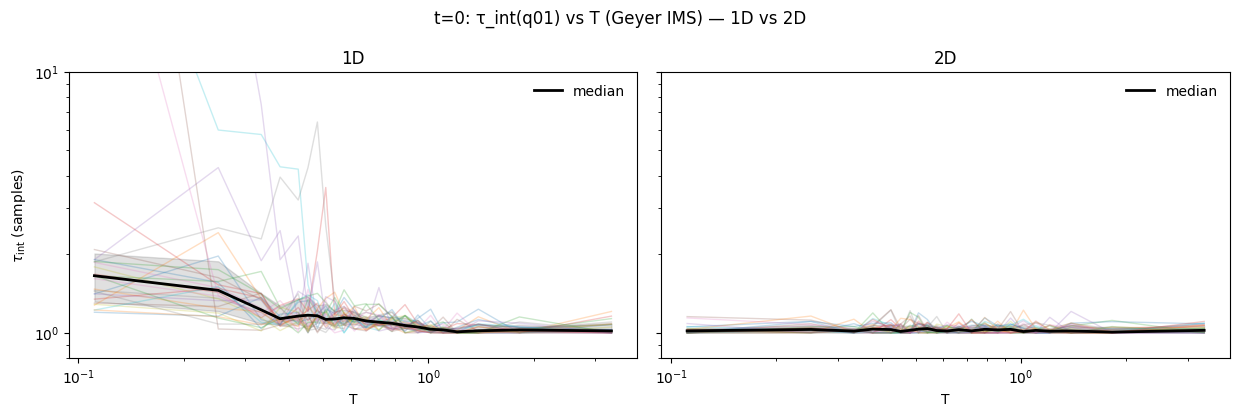

In [11]:
from dreamingnetz.data_extraction import f
from dreamingnetz.pt_tau import (
    row_slice, betas_by_row, tau_q01_t0, plot_tau_overlay_compare
)

run_root_2d = str((ROOT / "runs" / "prova_alpha04_N500_pool").resolve())
run_root_1d = str((ROOT / "runs" / "prova_edge_off_alpha04_N500_pool").resolve())

# meta: same ladder assumed
meta = f(run_root_2d, "meta")[0]
k_start = meta.k_start
b0 = 0
r0, r1 = row_slice(k_start, b0)
beta_t0 = betas_by_row(meta.beta, k_start, b0)
T_t0 = 1.0 / beta_t0

# q01 arrays
q01_1d = f(run_root_1d, "q01")
q01_2d = f(run_root_2d, "q01")

tau_q1d = tau_q01_t0(q01_1d, k_start=k_start, burn=0.0, min_n=200)
tau_q2d = tau_q01_t0(q01_2d, k_start=k_start, burn=0.0, min_n=200)

plot_tau_overlay_compare(
    T_t0,
    tau_q1d.tau_geyer,
    tau_q2d.tau_geyer,
    labels=("1D", "2D"),
    log_x=True,
    yscale="log",          # or "log"
    ylim=(0.8, 10),           # optional
    suptitle="t=0: τ_int(q01) vs T (Geyer IMS) — 1D vs 2D",
    xlabel="T",
)
plt.show()


[tau_norm2] mu=0 (1/20)
[tau_norm2] mu=1 (2/20)
[tau_norm2] mu=2 (3/20)
[tau_norm2] mu=3 (4/20)
[tau_norm2] mu=4 (5/20)
[tau_norm2] mu=5 (6/20)
[tau_norm2] mu=6 (7/20)
[tau_norm2] mu=7 (8/20)
[tau_norm2] mu=8 (9/20)
[tau_norm2] mu=9 (10/20)
[tau_norm2] mu=10 (11/20)
[tau_norm2] mu=11 (12/20)
[tau_norm2] mu=12 (13/20)
[tau_norm2] mu=13 (14/20)
[tau_norm2] mu=14 (15/20)
[tau_norm2] mu=15 (16/20)
[tau_norm2] mu=16 (17/20)
[tau_norm2] mu=17 (18/20)
[tau_norm2] mu=18 (19/20)
[tau_norm2] mu=19 (20/20)
[tau_norm2] mu=0 (1/20)
[tau_norm2] mu=1 (2/20)
[tau_norm2] mu=2 (3/20)
[tau_norm2] mu=3 (4/20)
[tau_norm2] mu=4 (5/20)
[tau_norm2] mu=5 (6/20)
[tau_norm2] mu=6 (7/20)
[tau_norm2] mu=7 (8/20)
[tau_norm2] mu=8 (9/20)
[tau_norm2] mu=9 (10/20)
[tau_norm2] mu=10 (11/20)
[tau_norm2] mu=11 (12/20)
[tau_norm2] mu=12 (13/20)
[tau_norm2] mu=13 (14/20)
[tau_norm2] mu=14 (15/20)
[tau_norm2] mu=15 (16/20)
[tau_norm2] mu=16 (17/20)
[tau_norm2] mu=17 (18/20)
[tau_norm2] mu=18 (19/20)
[tau_norm2] mu=19 (20/20

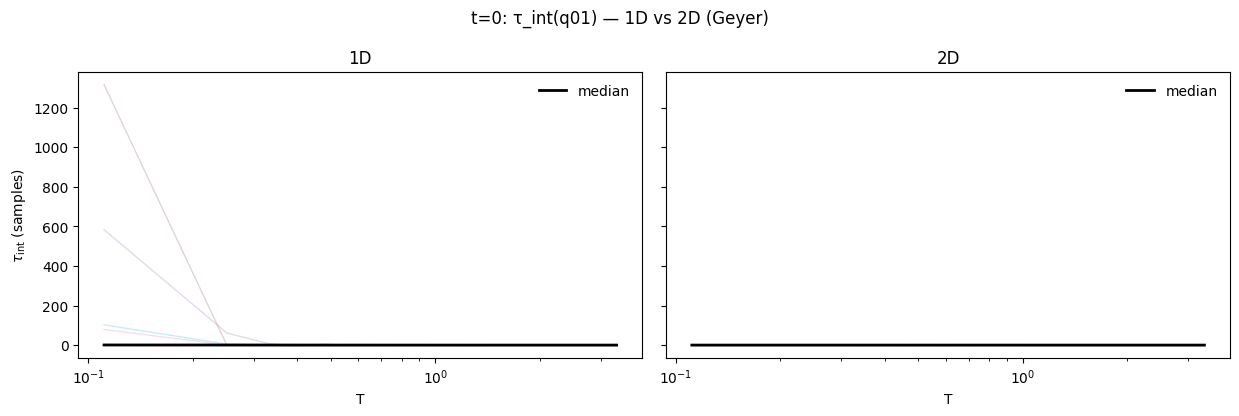

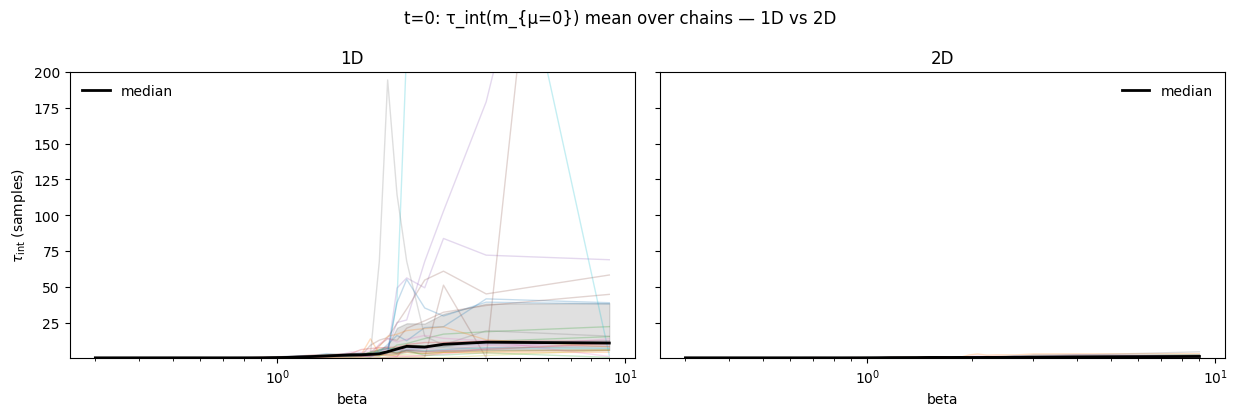

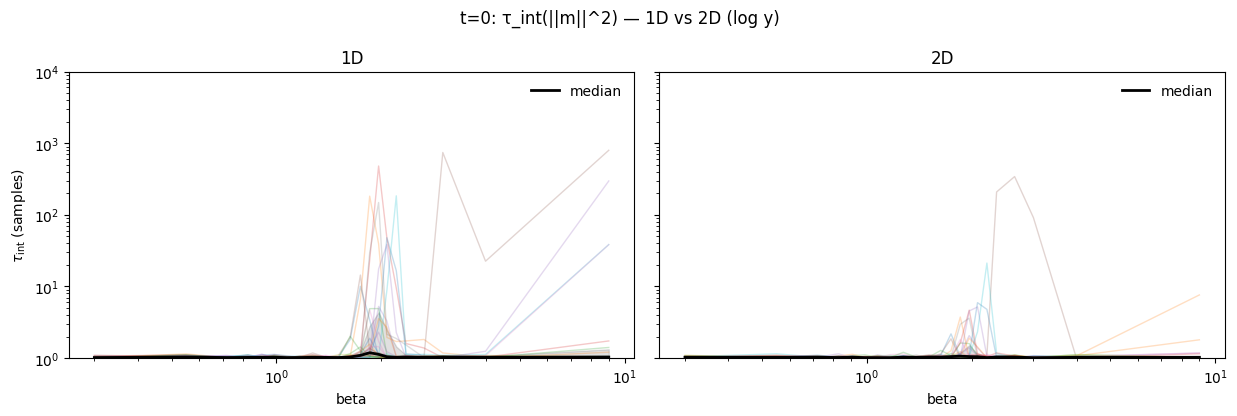

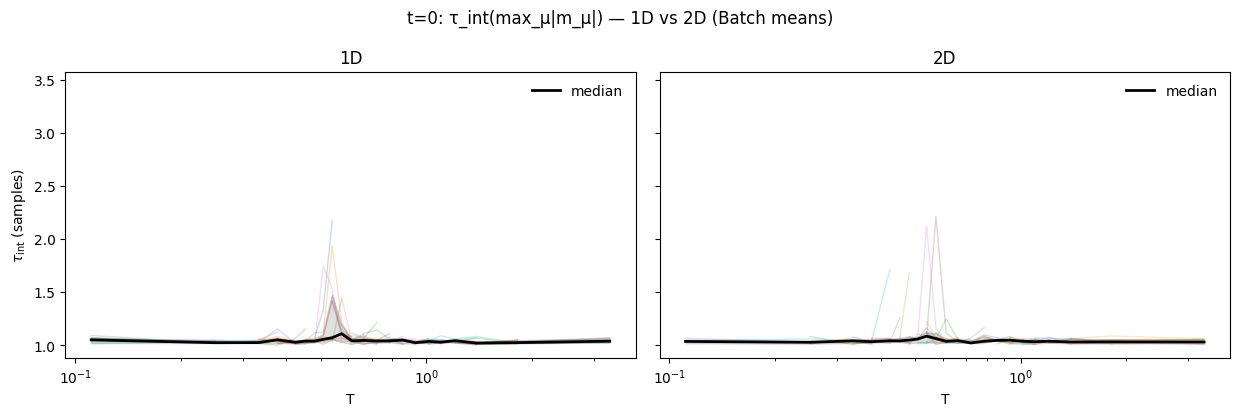

In [ ]:
from dreamingnetz.data_extraction import f
from dreamingnetz.pt_tau import compare_taus_from_roots, plot_compare_tau
import matplotlib.pyplot as plt
import numpy as np

run_root_2d = str((ROOT / "runs" / "prova_alpha04_N500_pool").resolve())
run_root_1d = str((ROOT / "runs" / "prova_edge_off_alpha04_N500_pool").resolve())

comp = compare_taus_from_roots(
    f,
    run_root_left=run_root_1d,
    run_root_right=run_root_2d,
    labels=("1D", "2D"),
    b=0,                 # t=0 row
    burn=0.0,
    min_n=200,
    compute_m_mu0=True,  # uses mu0 below
    mu0=0,
    compute_norm2=True,
    compute_maxabs=True,
    compute_all_mu=False,  # heavy; turn on when you want
    chain_reduce="mean",
    progress=True,
)


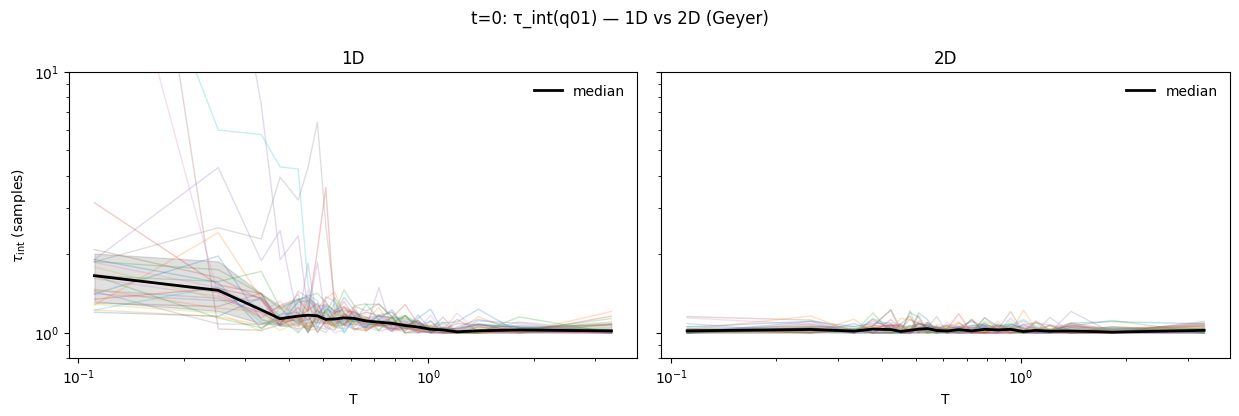

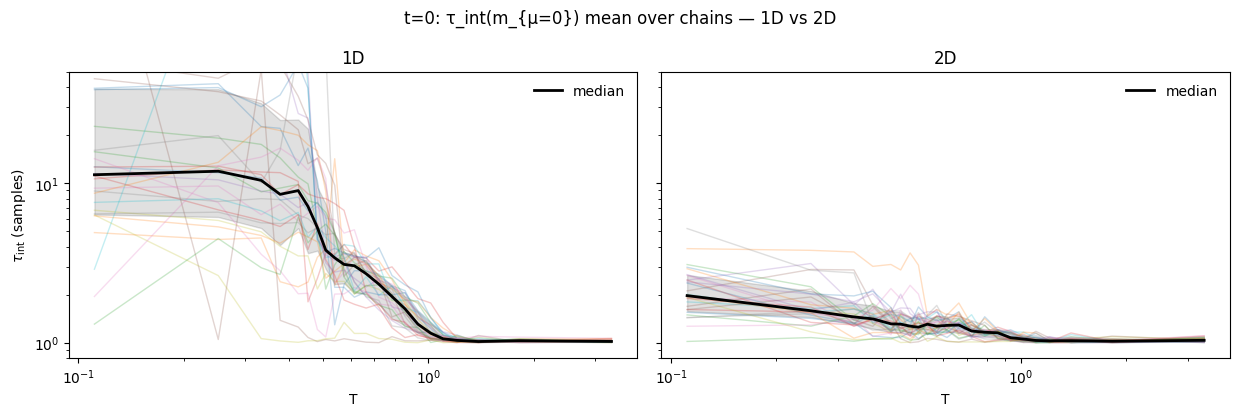

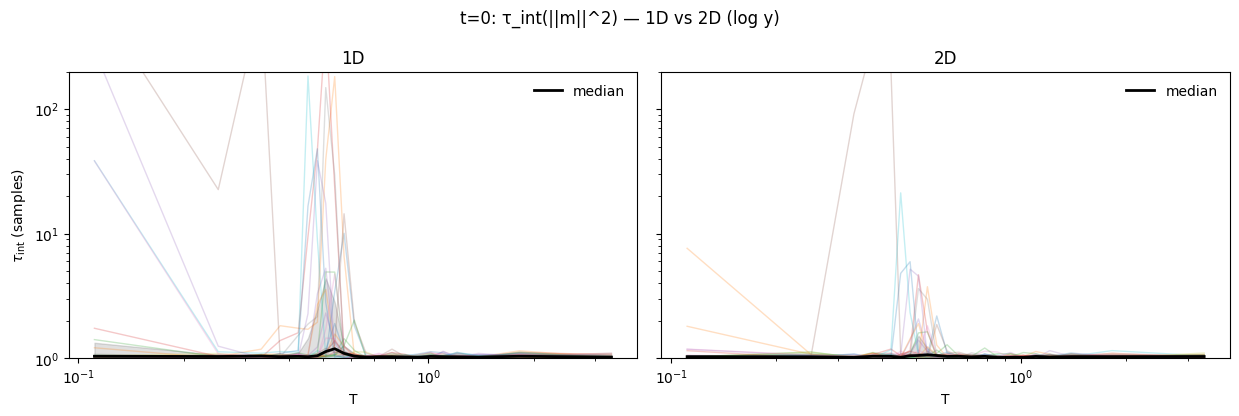

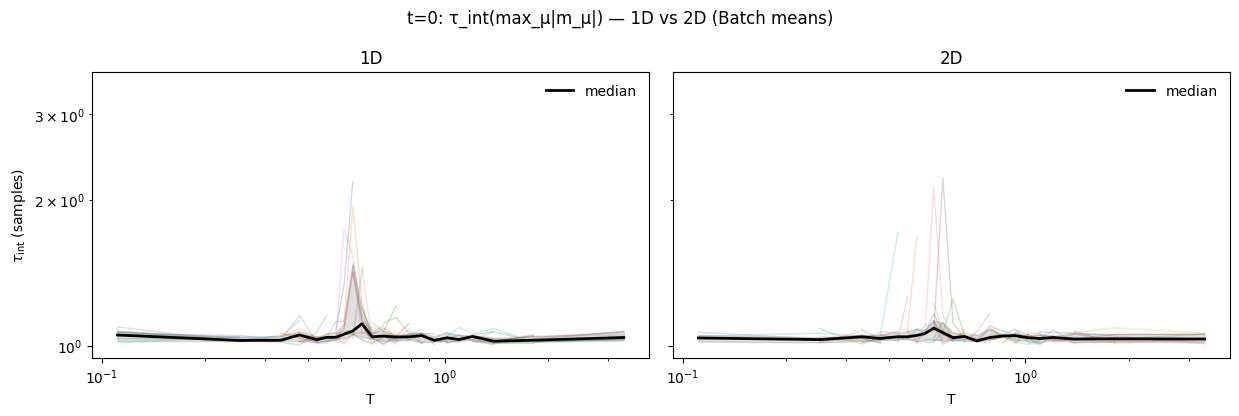

In [9]:

# one-liners:
plot_compare_tau(comp, obs="q01", x_axis="T", estimator="geyer",
                 yscale="log", ylim=(0.8, 10),
                 suptitle="t=0: τ_int(q01) — 1D vs 2D (Geyer)")
plt.show()

plot_compare_tau(comp, obs="m_mu0", x_axis="T", estimator="geyer",
                 yscale="log", ylim=(0.8, 50),
                 suptitle="t=0: τ_int(m_{μ=0}) mean over chains — 1D vs 2D")
plt.show()

plot_compare_tau(comp, obs="m_norm2", x_axis="T", estimator="geyer",
                 yscale="log", ylim=(1, 2e2),
                 suptitle="t=0: τ_int(||m||^2) — 1D vs 2D (log y)")
plt.show()

plot_compare_tau(comp, obs="m_maxabs", x_axis="T", estimator="bm",
                 yscale="log", ylim=None,
                 suptitle="t=0: τ_int(max_μ|m_μ|) — 1D vs 2D (Batch means)")
plt.show()


In [5]:
from dreamingnetz.data_extraction import f
from dreamingnetz.pt_tau import (
    compare_taus_from_roots, plot_compare_tau,
    compare_methods_within_run,
    compare_two_runs_ratio, compare_two_runs_summaries, compare_two_runs_reliability,
)
import matplotlib.pyplot as plt


In [6]:

run_root_2d = str((ROOT / "runs" / "prova_alpha04_N500_pool").resolve())
run_root_1d = str((ROOT / "runs" / "prova_edge_off_alpha04_N500_pool").resolve())

comp = compare_taus_from_roots(
    f,
    run_root_left=run_root_1d,
    run_root_right=run_root_2d,
    labels=("1D", "2D"),
    b=0,
    burn=0.0,
    min_n=200,
    compute_m_mu0=True, mu0=0,
    compute_norm2=True,
    compute_maxabs=True,
    compute_all_mu=False,     # flip later if you want the slowest-mu scan
    chain_reduce="mean",
    progress=True,
)


[tau_norm2] mu=0 (1/20)
[tau_norm2] mu=1 (2/20)
[tau_norm2] mu=2 (3/20)
[tau_norm2] mu=3 (4/20)
[tau_norm2] mu=4 (5/20)
[tau_norm2] mu=5 (6/20)
[tau_norm2] mu=6 (7/20)
[tau_norm2] mu=7 (8/20)
[tau_norm2] mu=8 (9/20)
[tau_norm2] mu=9 (10/20)
[tau_norm2] mu=10 (11/20)
[tau_norm2] mu=11 (12/20)
[tau_norm2] mu=12 (13/20)
[tau_norm2] mu=13 (14/20)
[tau_norm2] mu=14 (15/20)
[tau_norm2] mu=15 (16/20)
[tau_norm2] mu=16 (17/20)
[tau_norm2] mu=17 (18/20)
[tau_norm2] mu=18 (19/20)
[tau_norm2] mu=19 (20/20)
[tau_norm2] mu=0 (1/20)
[tau_norm2] mu=1 (2/20)
[tau_norm2] mu=2 (3/20)
[tau_norm2] mu=3 (4/20)
[tau_norm2] mu=4 (5/20)
[tau_norm2] mu=5 (6/20)
[tau_norm2] mu=6 (7/20)
[tau_norm2] mu=7 (8/20)
[tau_norm2] mu=8 (9/20)
[tau_norm2] mu=9 (10/20)
[tau_norm2] mu=10 (11/20)
[tau_norm2] mu=11 (12/20)
[tau_norm2] mu=12 (13/20)
[tau_norm2] mu=13 (14/20)
[tau_norm2] mu=14 (15/20)
[tau_norm2] mu=15 (16/20)
[tau_norm2] mu=16 (17/20)
[tau_norm2] mu=17 (18/20)
[tau_norm2] mu=18 (19/20)
[tau_norm2] mu=19 (20/20

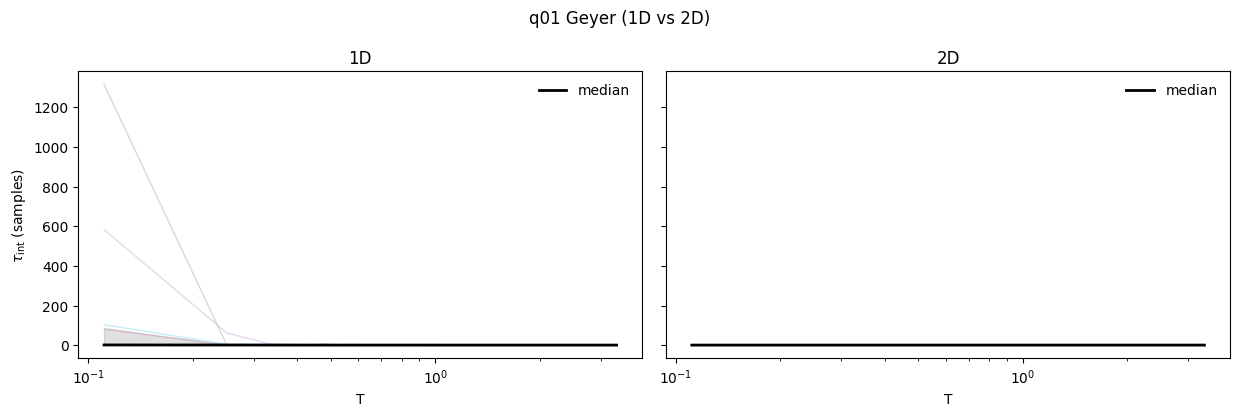

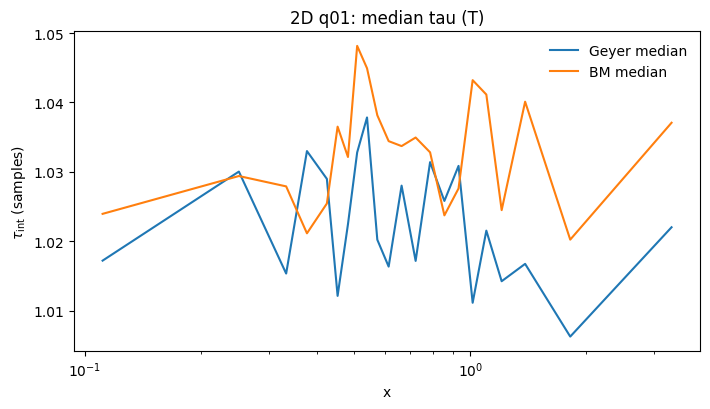

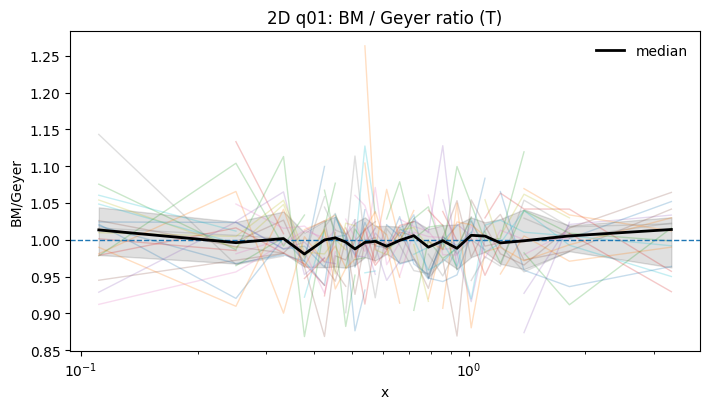

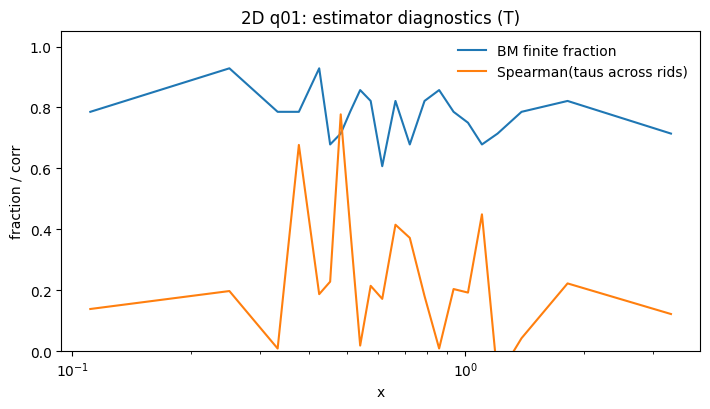

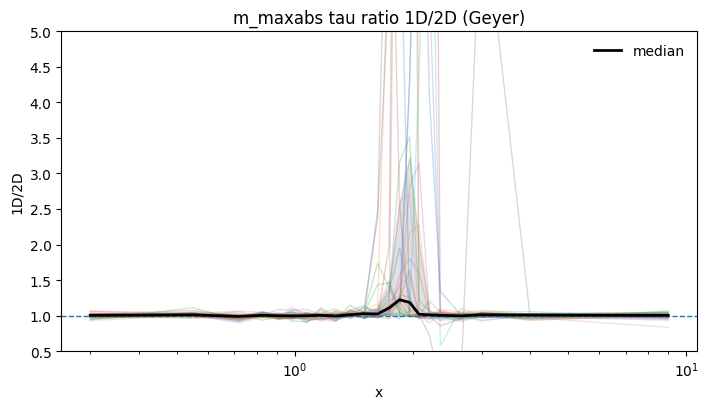

fraction improved at cold node: 0.5


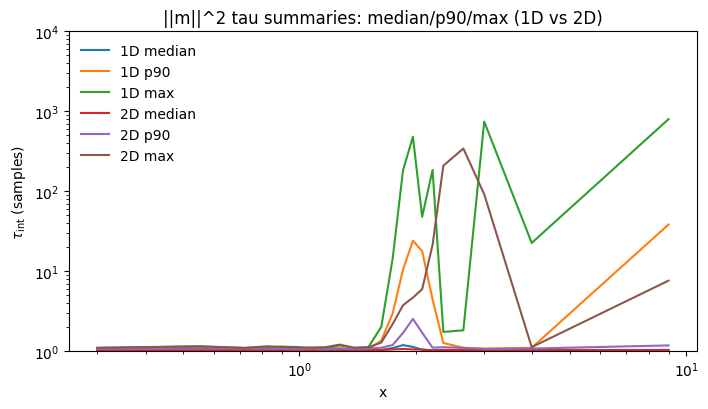

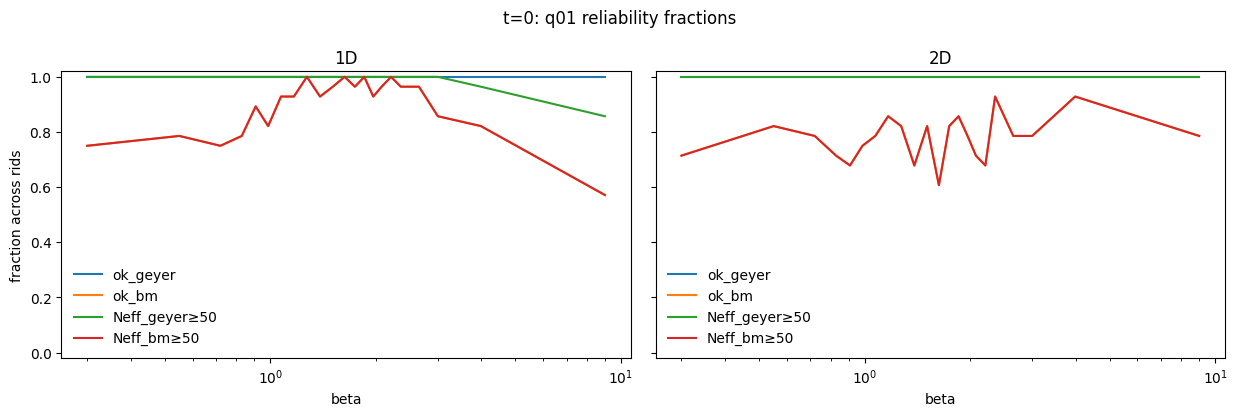

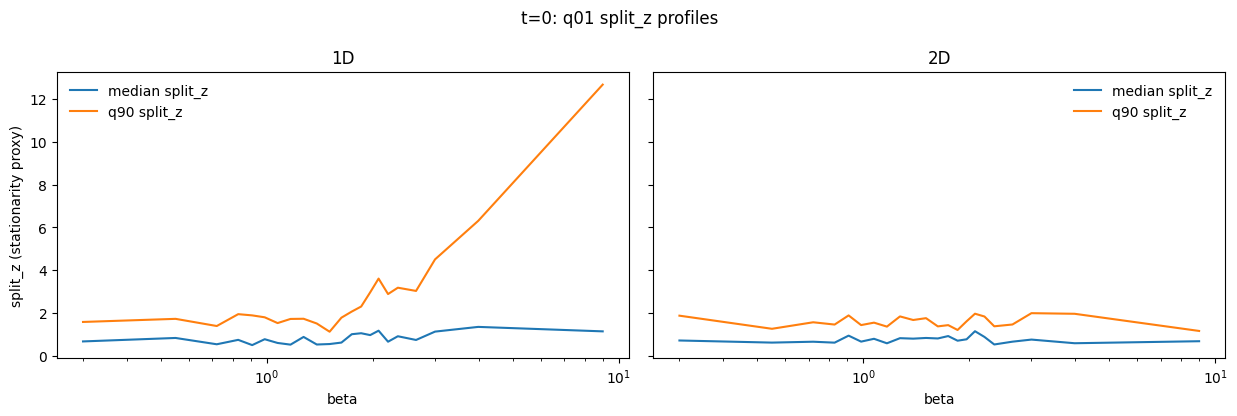

In [7]:

# 1) Side-by-side overlays (you already have)
plot_compare_tau(comp, obs="q01", x_axis="T", estimator="geyer", suptitle="q01 Geyer (1D vs 2D)")
plt.show()

# 2) Estimator comparisons within a run (Geyer vs BM)
#    (example: q01 in 2D)
(fig1, _), (fig2, _), (fig3, _) = compare_methods_within_run(
    comp.right.q01,
    x=comp.T_row,
    x_axis="T",
    yscale="linear",
    title_prefix="2D q01:",
)
plt.show()

# 3) Paired improvement ratio 1D/2D (per disorder, per beta)
fig, ax, pc = compare_two_runs_ratio(
    comp, obs="m_maxabs", estimator="geyer", x_axis="beta",
    yscale="linear", ylim=(0.5, 5),
    title="m_maxabs tau ratio 1D/2D (Geyer)",
)
plt.show()
print("fraction improved at cold node:", pc.frac_improved_by_node[-1])  # if cold is last beta in row

# 4) Typical vs bad vs worst disorder summaries
fig, ax = compare_two_runs_summaries(
    comp, obs="m_norm2", estimator="geyer", x_axis="beta",
    yscale="log", ylim=(1, 1e4),
    title="||m||^2 tau summaries: median/p90/max (1D vs 2D)",
)
plt.show()

# 5) Reliability comparisons (Neff, ok, split_z)
(figA, _), (figB, _) = compare_two_runs_reliability(
    comp, obs="q01", x_axis="beta", neff_thresh=50, title_prefix="t=0: "
)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from dreamingnetz.data_extraction import f
from dreamingnetz.pt_tau import (
    compare_taus_from_roots,
    plot_compare_tau,
    compare_two_runs_ratio,
)

run_root_2d = str((ROOT / "runs" / "prova_alpha04_N500_pool").resolve())
run_root_1d = str((ROOT / "runs" / "prova_edge_off_alpha04_N500_pool").resolve())

# 1) compute everything once (q01 + m_mu0 + norm2 + maxabs)
comp = compare_taus_from_roots(
    f,
    run_root_left=run_root_1d,
    run_root_right=run_root_2d,
    labels=("1D", "2D"),
    b=0,
    burn=0.0,
    min_n=200,
    compute_m_mu0=True, mu0=0,
    compute_norm2=True,
    compute_maxabs=True,
    compute_all_mu=False,
    chain_reduce="mean",
    progress=True,
)


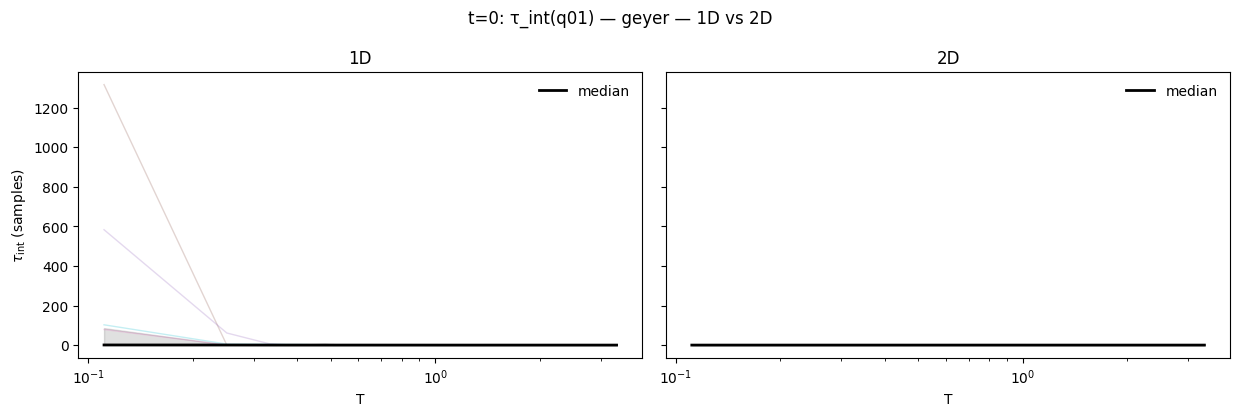

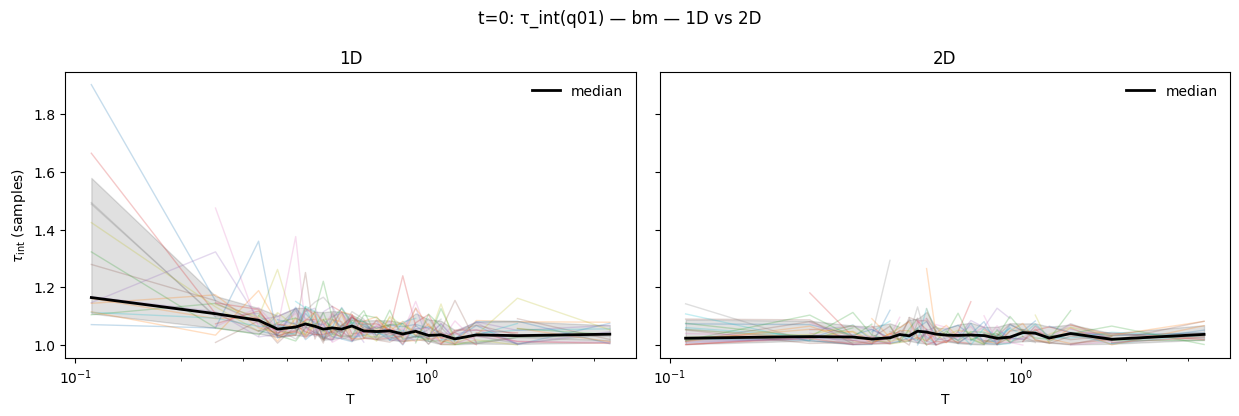

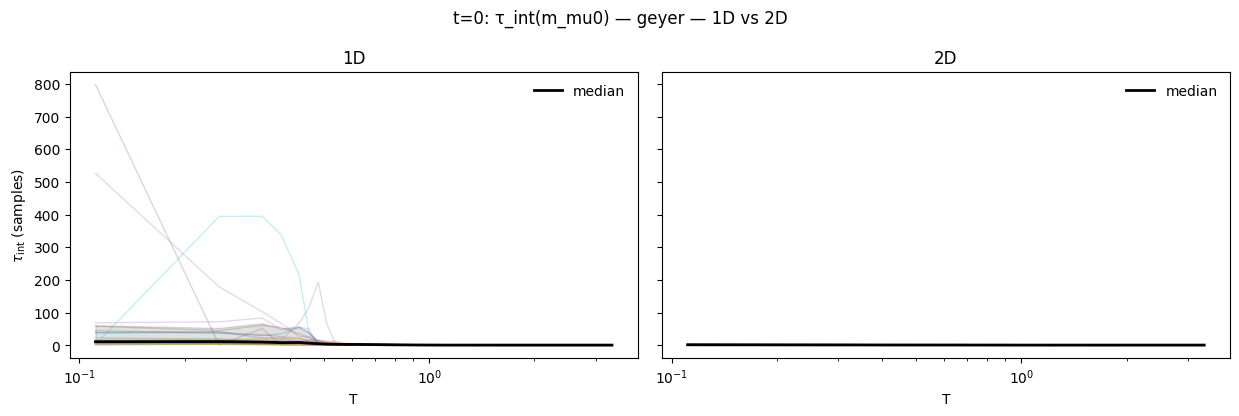

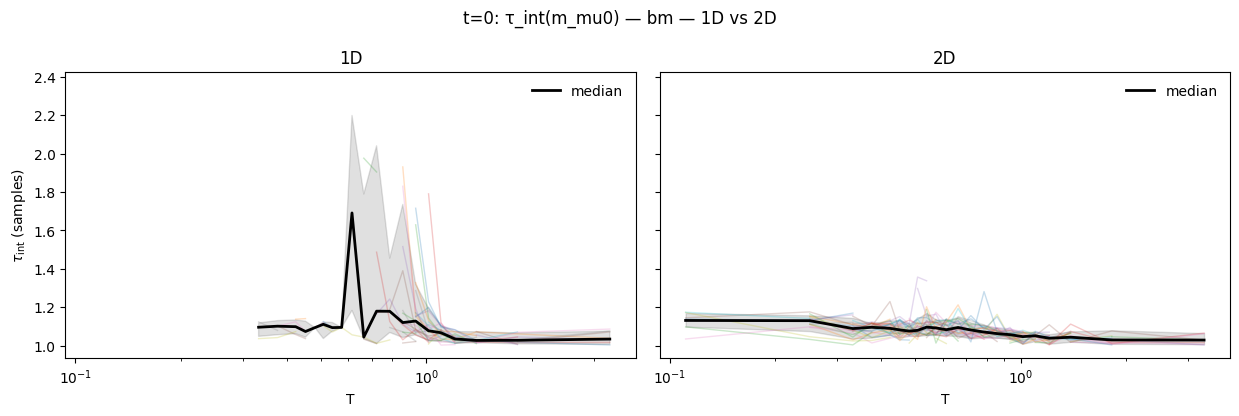

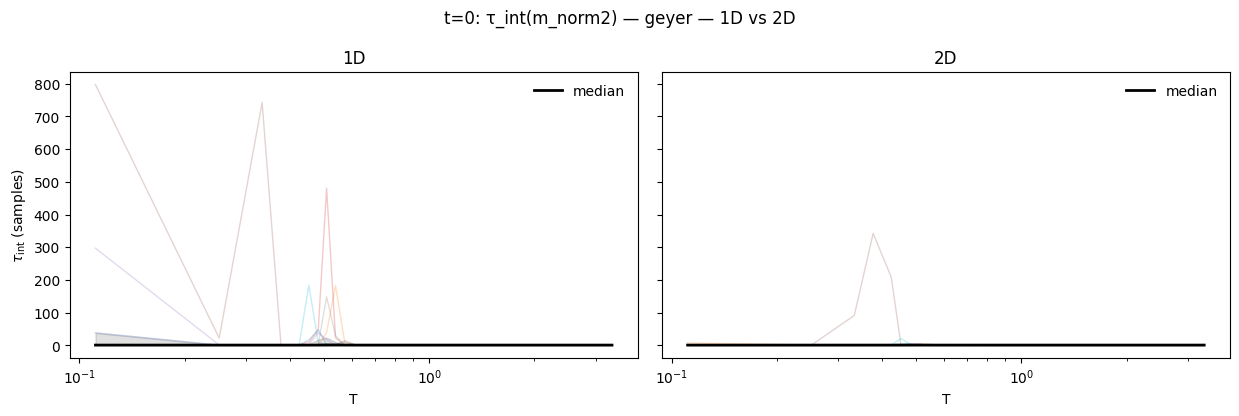

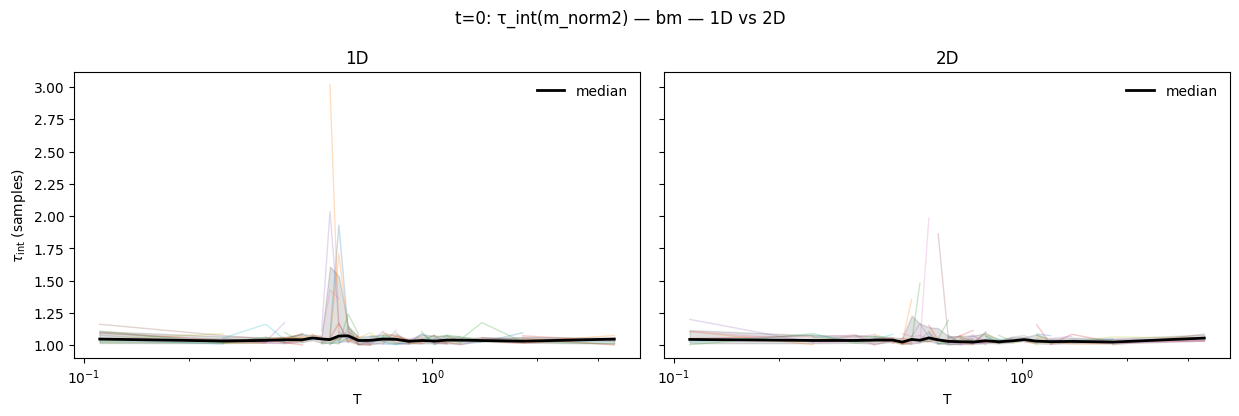

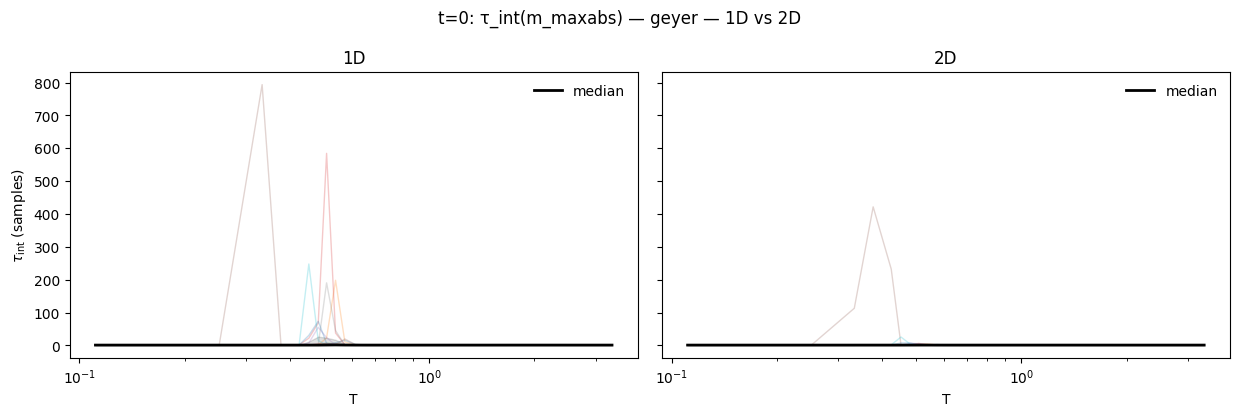

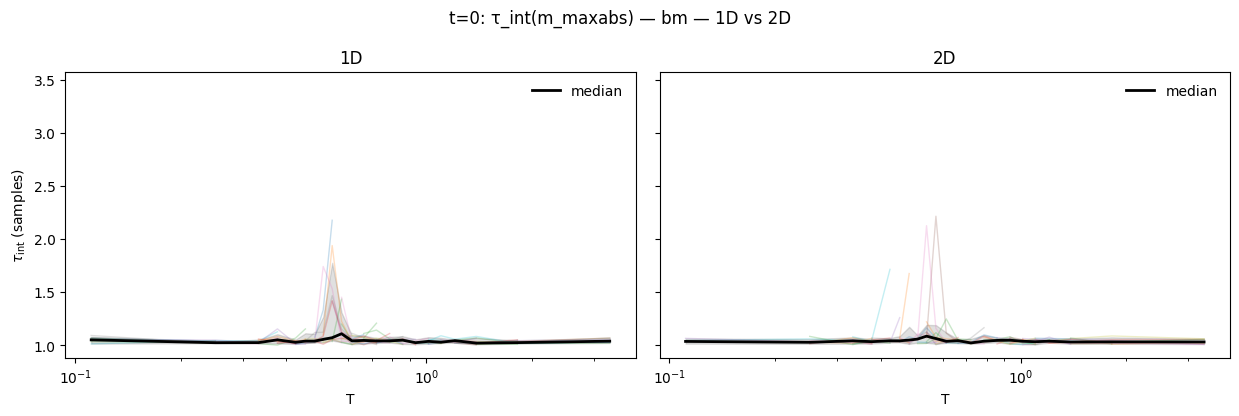

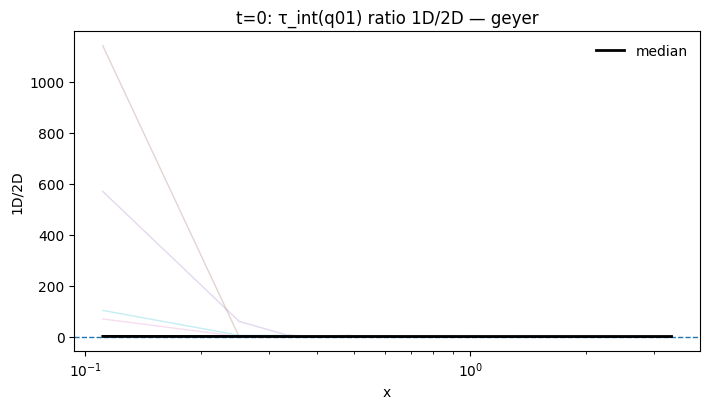

[q01 | geyer] frac improved by node: [0.42857143 0.64285714 0.57142857 0.42857143 0.46428571 0.57142857
 0.60714286 0.78571429 0.78571429 0.78571429 0.89285714 0.89285714
 0.89285714 0.89285714 0.92857143 0.89285714 0.71428571 0.89285714
 0.89285714 0.96428571 0.92857143 1.        ]


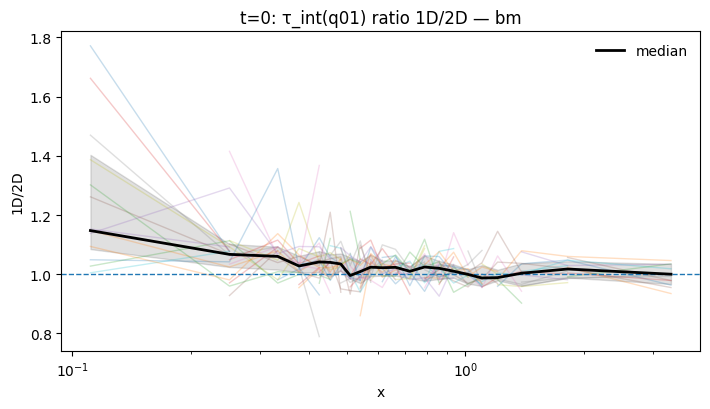

[q01 | bm] frac improved by node: [0.32142857 0.42857143 0.28571429 0.17857143 0.28571429 0.32142857
 0.5        0.5        0.46428571 0.42857143 0.60714286 0.46428571
 0.53571429 0.46428571 0.35714286 0.57142857 0.5        0.71428571
 0.64285714 0.60714286 0.60714286 0.53571429]


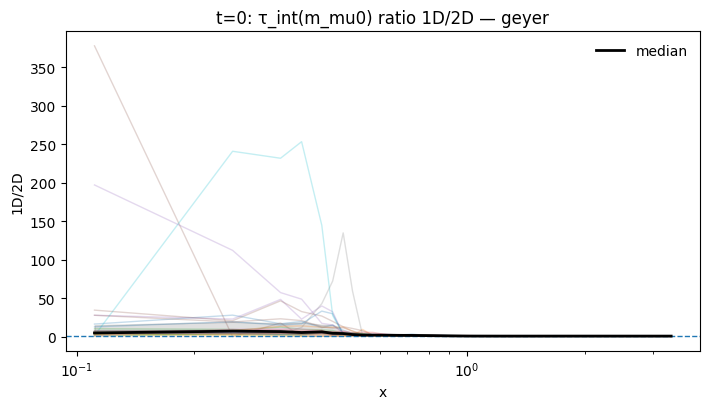

[m_mu0 | geyer] frac improved by node: [0.32142857 0.57142857 0.42857143 0.53571429 0.78571429 0.89285714
 0.92857143 0.92857143 1.         0.96428571 0.96428571 1.
 1.         0.96428571 0.96428571 0.96428571 0.96428571 0.89285714
 0.89285714 1.         0.96428571 1.        ]


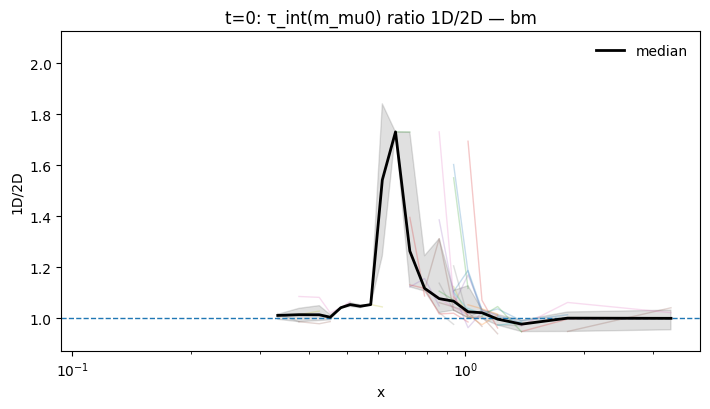

[m_mu0 | bm] frac improved by node: [0.14285714 0.21428571 0.07142857 0.21428571 0.39285714 0.60714286
 0.67857143 0.35714286 0.17857143 0.17857143 0.03571429 0.07142857
 0.03571429 0.07142857 0.07142857 0.03571429 0.03571429 0.07142857
 0.10714286 0.07142857 0.         0.03571429]


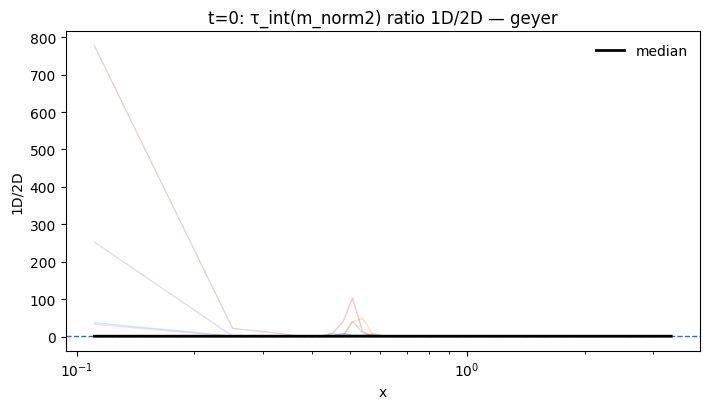

[m_norm2 | geyer] frac improved by node: [0.5        0.60714286 0.42857143 0.57142857 0.5        0.60714286
 0.46428571 0.57142857 0.35714286 0.5        0.28571429 0.53571429
 0.78571429 0.92857143 0.82142857 0.67857143 0.71428571 0.46428571
 0.46428571 0.71428571 0.67857143 0.64285714]


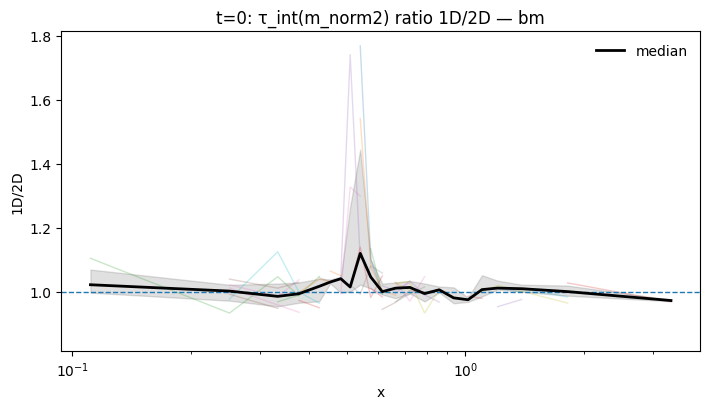

[m_norm2 | bm] frac improved by node: [0.         0.25       0.17857143 0.32142857 0.17857143 0.
 0.10714286 0.14285714 0.17857143 0.32142857 0.28571429 0.17857143
 0.32142857 0.25       0.21428571 0.17857143 0.17857143 0.25
 0.10714286 0.10714286 0.17857143 0.07142857]


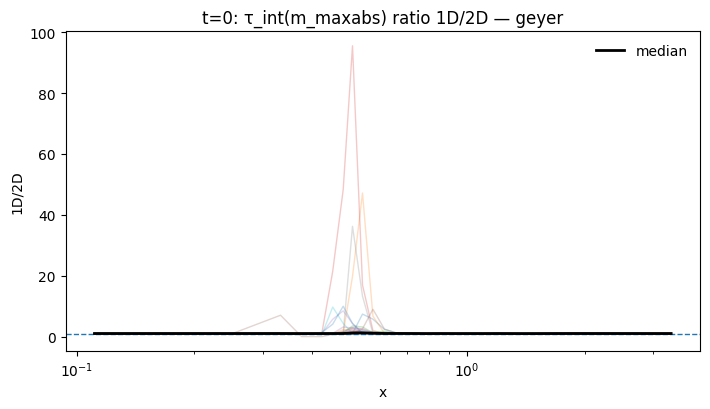

[m_maxabs | geyer] frac improved by node: [0.57142857 0.67857143 0.32142857 0.53571429 0.46428571 0.42857143
 0.46428571 0.60714286 0.42857143 0.75       0.60714286 0.60714286
 0.92857143 0.85714286 0.75       0.67857143 0.67857143 0.53571429
 0.42857143 0.67857143 0.64285714 0.5       ]


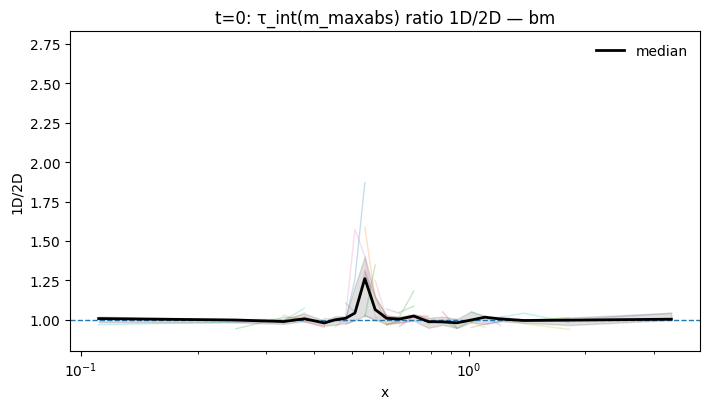

[m_maxabs | bm] frac improved by node: [0.14285714 0.21428571 0.10714286 0.14285714 0.14285714 0.17857143
 0.07142857 0.14285714 0.14285714 0.25       0.21428571 0.32142857
 0.32142857 0.39285714 0.17857143 0.21428571 0.14285714 0.07142857
 0.14285714 0.07142857 0.10714286 0.07142857]


In [19]:

observables = ["q01", "m_mu0", "m_norm2", "m_maxabs"]
estimators  = ["geyer", "bm"]

# 2) side-by-side overlays (1D vs 2D) for each obs & estimator
for obs in observables:
    for est in estimators:
        plot_compare_tau(
            comp,
            obs=obs,
            estimator=est,
            x_axis="T",
            log_x=True,
            yscale="linear",      # change to "log" if you want
            ylim=None,            # e.g. (0.8, 200) or (1, 1e4)
            suptitle=f"t=0: τ_int({obs}) — {est} — 1D vs 2D",
        )
        plt.show()

# 3) ratio plots: (tau_1d / tau_2d) > 1 means 2D has smaller tau (better)
for obs in observables:
    for est in estimators:
        fig, ax, pc = compare_two_runs_ratio(
            comp,
            obs=obs,
            estimator=est,
            x_axis="T",
            log_x=True,
            yscale="linear",      # ratio is usually better linear; can use "log"
            ylim=None,            # e.g. (0.5, 5)
            title=f"t=0: τ_int({obs}) ratio 1D/2D — {est}",
        )
        plt.show()
        # optional: print fraction improved per node
        print(f"[{obs} | {est}] frac improved by node:", pc.frac_improved_by_node)


In [9]:
import numpy as np

tau1 = comp.left.m_mu0   # 1D
tau2 = comp.right.m_mu0  # 2D

print("BM finite fraction per node (1D):", np.mean(np.isfinite(tau1.tau_bm), axis=0))
print("BM ok fraction per node    (1D):", np.mean(tau1.ok_bm, axis=0))

print("BM finite fraction per node (2D):", np.mean(np.isfinite(tau2.tau_bm), axis=0))
print("BM ok fraction per node    (2D):", np.mean(tau2.ok_bm, axis=0))


BM finite fraction per node (1D): [0.42857143 0.53571429 0.64285714 0.71428571 0.78571429 0.85714286
 0.82142857 0.5        0.25       0.28571429 0.10714286 0.07142857
 0.03571429 0.10714286 0.14285714 0.03571429 0.10714286 0.14285714
 0.17857143 0.10714286 0.         0.03571429]
BM ok fraction per node    (1D): [0.42857143 0.53571429 0.64285714 0.71428571 0.78571429 0.85714286
 0.82142857 0.5        0.25       0.28571429 0.10714286 0.07142857
 0.03571429 0.10714286 0.14285714 0.03571429 0.10714286 0.14285714
 0.17857143 0.10714286 0.         0.03571429]
BM finite fraction per node (2D): [0.42857143 0.64285714 0.57142857 0.60714286 0.64285714 0.78571429
 0.89285714 0.85714286 0.92857143 0.92857143 0.82142857 0.96428571
 0.92857143 0.92857143 0.85714286 0.85714286 0.89285714 0.92857143
 0.85714286 0.89285714 0.60714286 0.42857143]
BM ok fraction per node    (2D): [0.42857143 0.64285714 0.57142857 0.60714286 0.64285714 0.78571429
 0.89285714 0.85714286 0.92857143 0.92857143 0.82142857 0.

In [10]:
from dreamingnetz.pt_tau import tau_m_mu_row, load_common_meta

meta = load_common_meta(f, run_root_1d)
k_start = meta.k_start

m0_1d = f(run_root_1d, "m", mu=0)

tau_strict = tau_m_mu_row(m0_1d, k_start=k_start, b=0, burn=0.0, min_n=200, chain_reduce="mean")
tau_loose  = tau_m_mu_row(
    m0_1d, k_start=k_start, b=0, burn=0.0, min_n=200, chain_reduce="mean",
    bm_min_batches=10, bm_rel_tol=0.20, bm_consec=1
)

print("strict BM ok frac:", np.mean(tau_strict.ok_bm, axis=0))
print("loose  BM ok frac:", np.mean(tau_loose.ok_bm, axis=0))



strict BM ok frac: [0.42857143 0.53571429 0.64285714 0.71428571 0.78571429 0.85714286
 0.82142857 0.5        0.25       0.28571429 0.10714286 0.07142857
 0.03571429 0.10714286 0.14285714 0.03571429 0.10714286 0.14285714
 0.17857143 0.10714286 0.         0.03571429]
loose  BM ok frac: [0.78571429 0.82142857 0.82142857 0.89285714 0.92857143 0.96428571
 0.96428571 1.         1.         1.         1.         1.
 1.         1.         0.96428571 0.89285714 0.85714286 0.92857143
 0.96428571 0.89285714 0.46428571 0.39285714]


In [11]:
import numpy as np

tau1 = comp.left.m_mu0   # 1D, chain_reduce="mean"
tau2 = comp.right.m_mu0  # 2D

print("1D median split_z:", np.nanmedian(tau1.split_z, axis=0))
print("2D median split_z:", np.nanmedian(tau2.split_z, axis=0))


1D median split_z: [0.80878758 0.81523854 0.6876198  0.94062796 0.6390501  0.90307302
 0.96457271 1.13632404 1.14047696 1.01026433 1.45573766 1.30773096
 1.44927583 2.1332895  1.88740375 2.73472182 2.84770496 3.32305607
 2.80747645 4.01294093 3.83024852 4.49882472]
2D median split_z: [0.85210577 0.68508791 0.6929073  0.66307331 0.82380123 0.77360396
 0.61431686 0.92500506 0.77748429 0.81629385 0.84780332 1.01569423
 1.25176645 1.22897312 1.11258276 1.08028955 1.16506661 1.14195453
 1.4123439  1.36241903 1.63497652 1.47237025]


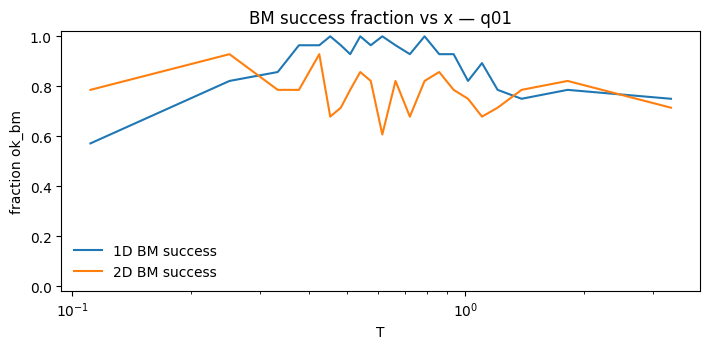

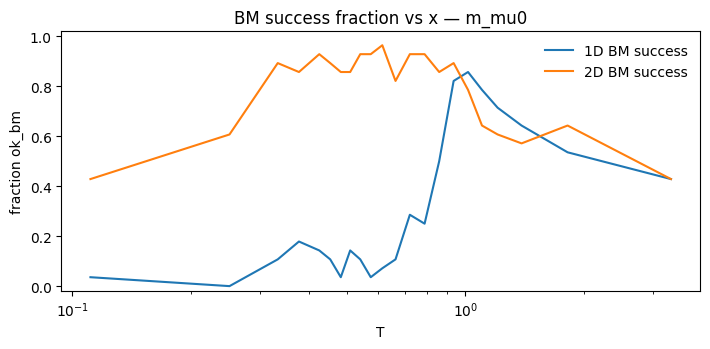

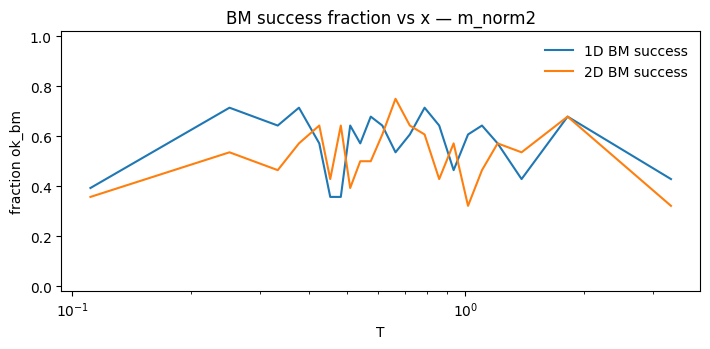

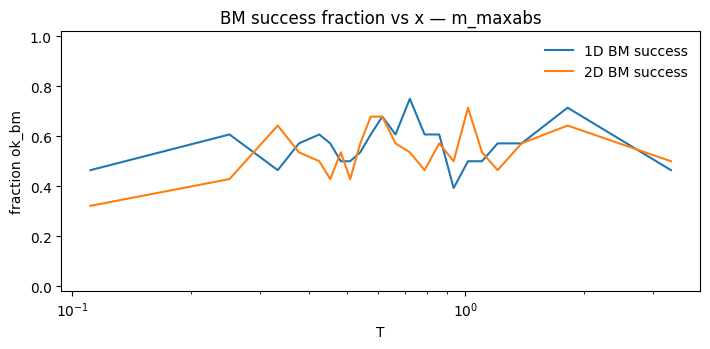

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def bm_success_fraction(tau_grid):
    # tau_grid: TauGrid with ok_bm shape (n_rid,K)
    return np.mean(tau_grid.ok_bm, axis=0)

x = comp.T_row  # or comp.beta_row

for obs in ["q01", "m_mu0", "m_norm2", "m_maxabs"]:
    L = getattr(comp.left, obs)
    R = getattr(comp.right, obs)
    if L is None or R is None:
        continue

    fig, ax = plt.subplots(figsize=(7.2, 3.6))
    ax.plot(x, bm_success_fraction(L), label=f"{comp.labels[0]} BM success")
    ax.plot(x, bm_success_fraction(R), label=f"{comp.labels[1]} BM success")
    ax.set_xscale("log")
    ax.set_ylim(-0.02, 1.02)
    ax.set_xlabel("T" if x is comp.T_row else "beta")
    ax.set_ylabel("fraction ok_bm")
    ax.set_title(f"BM success fraction vs x — {obs}")
    ax.legend(frameon=False)
    fig.tight_layout()
    plt.show()


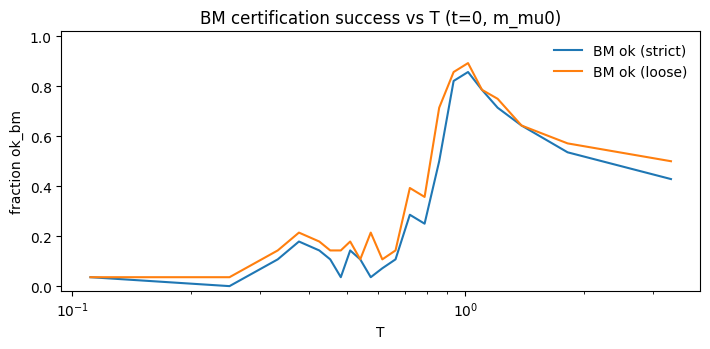

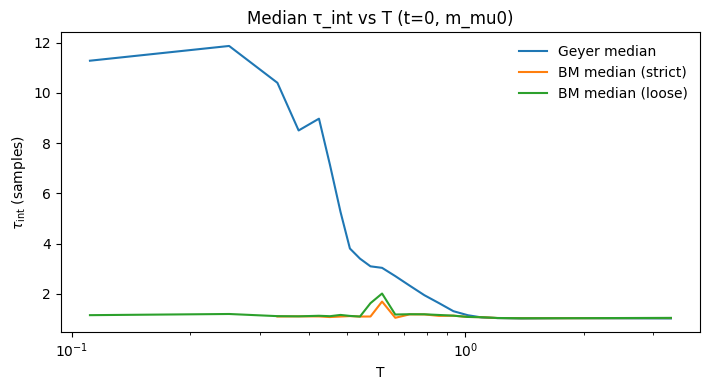

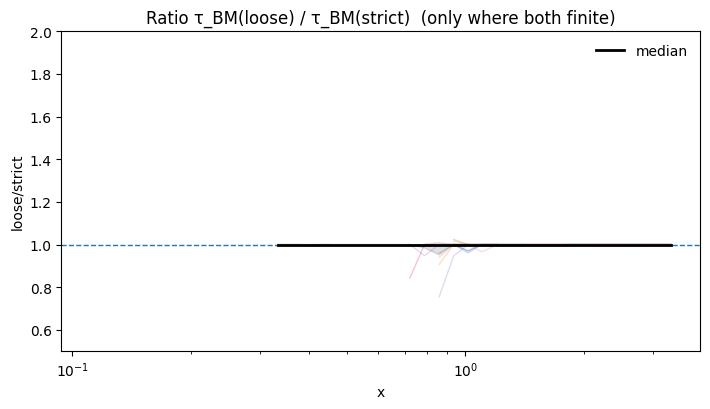

Global BM ok fraction (strict): 0.3133116883116883
Global BM ok fraction (loose) : 0.3685064935064935


In [18]:
import numpy as np
import matplotlib.pyplot as plt

from dreamingnetz.data_extraction import f
from dreamingnetz.pt_tau import (
    load_common_meta, betas_by_row,
    tau_m_mu_row, summarize_over_rids, plot_profile_lines, plot_ratio_overlay
)

# pick the run you want to diagnose first
run_root = run_root_1d   # or run_root_2d

# ladder
meta = load_common_meta(f, run_root)
k_start = meta.k_start
b = 0
beta = betas_by_row(meta.beta, k_start, b)
T = 1.0 / beta

# observable
mu0 = 0
m0 = f(run_root, "m", mu=mu0)

# common knobs
burn = 0.0
min_n = 200

# ---- STRICT BM (your defaults) ----
tau_strict = tau_m_mu_row(
    m0, k_start=k_start, b=b, burn=burn, min_n=min_n,
    chain_reduce="mean",
    bm_min_batches=30, bm_rel_tol=0.10, bm_consec=2,
)

# ---- LOOSE BM (allows larger batch sizes / weaker plateau requirement) ----
tau_loose = tau_m_mu_row(
    m0, k_start=k_start, b=b, burn=burn, min_n=min_n,
    chain_reduce="mean",
    bm_min_batches=20, bm_rel_tol=0.12, bm_consec=2,
)

# 1) success fractions
ok_strict = np.mean(tau_strict.ok_bm, axis=0)  # (K,)
ok_loose  = np.mean(tau_loose.ok_bm, axis=0)

fig, ax = plt.subplots(figsize=(7.2, 3.6))
ax.plot(T, ok_strict, label="BM ok (strict)")
ax.plot(T, ok_loose,  label="BM ok (loose)")
ax.set_xscale("log")
ax.set_ylim(-0.02, 1.02)
ax.set_xlabel("T")
ax.set_ylabel("fraction ok_bm")
ax.set_title("BM certification success vs T (t=0, m_mu0)")
ax.legend(frameon=False)
fig.tight_layout()
plt.show()

# 2) median taus (BM strict/loose + Geyer reference)
sG = summarize_over_rids(tau_strict.tau_geyer)  # geyer doesn't depend on BM knobs; either strict/loose object fine
sB_strict = summarize_over_rids(tau_strict.tau_bm)
sB_loose  = summarize_over_rids(tau_loose.tau_bm)

fig, ax = plt.subplots(figsize=(7.2, 4.0))
ax.plot(T, sG.median,       label="Geyer median")
ax.plot(T, sB_strict.median,label="BM median (strict)")
ax.plot(T, sB_loose.median, label="BM median (loose)")
ax.set_xscale("log")
ax.set_xlabel("T")
ax.set_ylabel(r"$\tau_{\mathrm{int}}$ (samples)")
ax.set_title("Median τ_int vs T (t=0, m_mu0)")
ax.legend(frameon=False)
fig.tight_layout()
plt.show()

# 3) ratio loose/strict where both finite (overlay per disorder)
# mask pairs where strict is missing
mask = np.isfinite(tau_strict.tau_bm) & np.isfinite(tau_loose.tau_bm)
ratio = np.where(mask, tau_loose.tau_bm / tau_strict.tau_bm, np.nan)

plot_ratio_overlay(
    T, ratio,
    log_x=True, yscale="linear", ylim=(0.5, 2.0),
    title="Ratio τ_BM(loose) / τ_BM(strict)  (only where both finite)",
    ylabel="loose/strict",
)
plt.show()

print("Global BM ok fraction (strict):", float(np.mean(tau_strict.ok_bm)))
print("Global BM ok fraction (loose) :", float(np.mean(tau_loose.ok_bm)))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from dreamingnetz.data_extraction import f
from dreamingnetz.pt_tau import (
    load_common_meta, row_slice, betas_by_row,
    tau_q01_row, tau_m_mu_row,
    burn_compare_taugrids,
    plot_tau_overlay_compare, plot_ratio_overlay, plot_profile_lines
)

run_root_2d = str((ROOT / "runs" / "prova_alpha04_N500_pool").resolve())
run_root_1d = str((ROOT / "runs" / "prova_edge_off_alpha04_N500_pool").resolve())

# common ladder
meta = load_common_meta(f, run_root_2d)
k_start = meta.k_start
b = 0
beta = betas_by_row(meta.beta, k_start, b)
T = 1.0 / beta

burn_a = 0.0
burn_b = 0.10
min_n = 200
mu0 = 0

def do_one_root(root, label):
    # --- q01 ---
    q = f(root, "q01")
    tau_q_a = tau_q01_row(q, k_start=k_start, b=b, burn=burn_a, min_n=min_n)
    tau_q_b = tau_q01_row(q, k_start=k_start, b=b, burn=burn_b, min_n=min_n)

    # --- m_mu0 ---
    m0 = f(root, "m", mu=mu0)
    tau_m_a = tau_m_mu_row(m0, k_start=k_start, b=b, burn=burn_a, min_n=min_n, chain_reduce="mean")
    tau_m_b = tau_m_mu_row(m0, k_start=k_start, b=b, burn=burn_b, min_n=min_n, chain_reduce="mean")

    # 1) Overlay plots: burn0 vs burn10%
    plot_tau_overlay_compare(
        T, tau_q_a.tau_geyer, tau_q_b.tau_geyer,
        labels=(f"{label} burn=0", f"{label} burn=0.1"),
        log_x=True, yscale="linear",
        suptitle=f"{label}: q01 τ_int (Geyer) — burn sensitivity", xlabel="T",
        sharey=True
    ); plt.show()

    plot_tau_overlay_compare(
        T, tau_m_a.tau_geyer, tau_m_b.tau_geyer,
        labels=(f"{label} burn=0", f"{label} burn=0.1"),
        log_x=True, yscale="linear",
        suptitle=f"{label}: m_mu0 τ_int (Geyer) — burn sensitivity", xlabel="T",
        sharey=True
    ); plt.show()

    # 2) Ratio plots: burn0.1 / burn0  (should be ~1 everywhere)
    bc_q = burn_compare_taugrids(tau_q_a, tau_q_b, burn_a=burn_a, burn_b=burn_b, estimator="geyer")
    plot_ratio_overlay(
        T, bc_q.ratio_b_over_a,
        log_x=True, yscale="linear", ylim=(0.5, 2.0),
        title=f"{label}: q01 burn0.1 / burn0 (Geyer)", ylabel="ratio"
    ); plt.show()

    bc_m = burn_compare_taugrids(tau_m_a, tau_m_b, burn_a=burn_a, burn_b=burn_b, estimator="geyer")
    plot_ratio_overlay(
        T, bc_m.ratio_b_over_a,
        log_x=True, yscale="linear", ylim=(0.5, 2.0),
        title=f"{label}: m_mu0 burn0.1 / burn0 (Geyer)", ylabel="ratio"
    ); plt.show()

    # 3) split_z profiles (median + q90) for burn=0 and burn=0.1
    #    (if burn-in matters, split_z often drops when you discard early transient)
    def split_profiles(tau, name):
        med = np.nanmedian(tau.split_z, axis=0)
        q90 = np.nanquantile(tau.split_z, 0.90, axis=0)
        return [(med, f"{name} median split_z"), (q90, f"{name} q90 split_z")]

    profs = split_profiles(tau_q_a, "burn0") + split_profiles(tau_q_b, "burn0.1")
    plot_profile_lines(T, profs, log_x=True, yscale="linear",
                       title=f"{label}: q01 split_z profiles", ylabel="split_z"); plt.show()

    profs = split_profiles(tau_m_a, "burn0") + split_profiles(tau_m_b, "burn0.1")
    plot_profile_lines(T, profs, log_x=True, yscale="linear",
                       title=f"{label}: m_mu0 split_z profiles", ylabel="split_z"); plt.show()

    # quick numeric summaries
    print(f"\n[{label}] Numeric burn checks (medians over rids/nodes)")
    print("q01: median ratio burn0.1/burn0:", np.nanmedian(bc_q.ratio_b_over_a))
    print("m0 : median ratio burn0.1/burn0:", np.nanmedian(bc_m.ratio_b_over_a))
    print("q01: Spearman per node (median):", np.nanmedian(bc_q.spearman_by_node))
    print("m0 : Spearman per node (median):", np.nanmedian(bc_m.spearman_by_node))

# Run both roots
do_one_root(run_root_1d, "1D")
do_one_root(run_root_2d, "2D")


In [ ]:
# ----------------------------
# 4) tau_int for magnetization mu=0 (per chain then mean over chains)

# ----------------------------
tau_m0 = tau_m_mu_t0(m0_all, k_start=k_start, burn=burn, min_n=min_n, chain_reduce="mean")
# tau_m0.tau_geyer shape: (n_rid, K0)
print("== tau(m_mu0) ==")
print("tau_m0.tau_geyer shape:", tau_m0.tau_geyer.shape)
print("median Neff at cold node:", np.nanmedian(tau_m0.neff_geyer[:, k_cold]))
print("median split_z at cold node:", np.nanmedian(tau_m0.split_z[:, k_cold]))
print()

plot_tau_overlay(
    beta_t0,
    tau_m0.tau_geyer,
    log_x=True,
    title=f"t=0: tau_int(m_mu={mu0}) mean over chains via Geyer IMS (stored samples)",
)
plt.show()

In [6]:
# ============================
# ONE "TOUR" SCRIPT (copy/paste)
# ============================
# Assumptions:
# - You have `f` working (data_extraction.py)
# - You saved data under run_root_2d with r###/ subfolders
# - All disorders share the same ladder (same beta/K/k_start)
#
# This script:
#  (0) loads meta and defines the t=0 row slice
#  (1) loads + caches timeseries (E, q01, m_mu) and shows shapes
#  (2) builds common t=0 views (per node and cold node)
#  (3) computes tau_int vs beta for q01 and magnetization variants
#  (4) shows basic sanity stats (Neff, drift z)
#  (5) shows how to do "all mu" streamed tau (optional heavy)
#  (6) shows how to compute symmetry-respecting magnetization scalars (streamed)
#
# All tau are in *stored samples* units.



# ----------------------------
# 0) Load metadata (all disorders) and define the t=0 ladder slice
# ----------------------------
run_root = run_root_1d

metas = f(run_root, "meta")          # list[Meta], one per disorder
meta = metas[0]                      # assume same ladder for all
k_start = meta.k_start               # (B+1,)
t_grid = meta.t_grid                 # (B,)
beta_flat = meta.beta                # (R,)
K = meta.K                           # (B,)

# t=0 row is b=0
b0 = 0
r0, r1 = row_slice(k_start, b0)      # node indices in the flat graph axis
beta_t0 = betas_by_row(beta_flat, k_start, b0)   # (K0,)
T_t0 = 1.0 / beta_t0

# coldest node in t=0 (within the row)
k_cold = cold_node_index(beta_t0)    # index within 0..K0-1
r_cold = r0 + k_cold                 # index within full 0..R-1

print("== Meta summary ==")
print(f"n_rid={len(metas)}  B={meta.B}  R={meta.R}  t_grid={t_grid}")
print(f"t=0 row: b={b0}  r0:r1 = [{r0}:{r1}]  K0={beta_t0.size}")
print(f"cold node: k_cold={k_cold}  r_cold={r_cold}  beta_cold={beta_t0[k_cold]:.4g}  T_cold={T_t0[k_cold]:.4g}")
print(f"P_sel (stored mu count) = {meta.mu_to_store.size}")
print()

== Meta summary ==
n_rid=28  B=5  R=111  t_grid=[0.   0.05 0.11 0.25 0.5 ]
t=0 row: b=0  r0:r1 = [0:22]  K0=22
cold node: k_cold=21  r_cold=21  beta_cold=9  T_cold=0.1111
P_sel (stored mu count) = 20



== Meta summary ==
n_rid=28  B=5  R=111  t_grid=[0.   0.05 0.11 0.25 0.5 ]
t=0 row: b=0  r0:r1 = [0:22]  K0=22
cold node: k_cold=21  r_cold=21  beta_cold=9  T_cold=0.1111
P_sel (stored mu count) = 20

In [7]:
# ----------------------------
# 1) Load/caches time series arrays (stacked over disorders)
#    (these calls may build timeseries_full/*.full.npy caches on first use)
# ----------------------------
E_all   = f(run_root, "E")      # (n_rid, 2, T, R)
q01_all = f(run_root, "q01")    # (n_rid, T, R)

print("== Raw arrays ==")
print("E_all  shape:", E_all.shape, "  meaning: (rid, chain, time, node)")
print("q01_all shape:", q01_all.shape, " meaning: (rid, time, node)")
print()

# (Optional) load one magnetization component mu=0 (streamed, cheap)
mu0 = 0
m0_all = f(run_root, "m", mu=mu0)  # (n_rid, 2, T, R)
print("m0_all shape:", m0_all.shape, " meaning: (rid, chain, time, node)")
print()

== Raw arrays ==
E_all  shape: (28, 2, 5000, 111)   meaning: (rid, chain, time, node)
q01_all shape: (28, 5000, 111)  meaning: (rid, time, node)

m0_all shape: (28, 2, 5000, 111)  meaning: (rid, chain, time, node)



== Raw arrays ==
E_all  shape: (28, 2, 5000, 111)   meaning: (rid, chain, time, node)
q01_all shape: (28, 5000, 111)  meaning: (rid, time, node)

m0_all shape: (28, 2, 5000, 111)  meaning: (rid, chain, time, node)

In [8]:
# ----------------------------
# 2) Build t=0 views and cold-node views
# ----------------------------
# t=0 row slices (node axis is last for q01 and E)
E_t0   = E_all[..., r0:r1]        # (n_rid, 2, T, K0)
q01_t0 = q01_all[..., r0:r1]      # (n_rid, T, K0)
m0_t0  = m0_all[..., r0:r1]       # (n_rid, 2, T, K0)

# cold node time series (useful for quick checks)
E_cold   = E_all[..., r_cold]     # (n_rid, 2, T)
q01_cold = q01_all[..., r_cold]   # (n_rid, T)
m0_cold  = m0_all[..., r_cold]    # (n_rid, 2, T)

print("== t=0 slices ==")
print("E_t0   :", E_t0.shape)
print("q01_t0 :", q01_t0.shape)
print("m0_t0  :", m0_t0.shape)
print()

== t=0 slices ==
E_t0   : (28, 2, 5000, 22)
q01_t0 : (28, 5000, 22)
m0_t0  : (28, 2, 5000, 22)



== t=0 slices ==
E_t0   : (28, 2, 5000, 22)
q01_t0 : (28, 5000, 22)
m0_t0  : (28, 2, 5000, 22)

== tau(q01) ==
tau_q.tau_geyer shape: (28, 22)
median Neff at cold node: 1511.5308978753615
median split_z at cold node: 1.1454613303910854



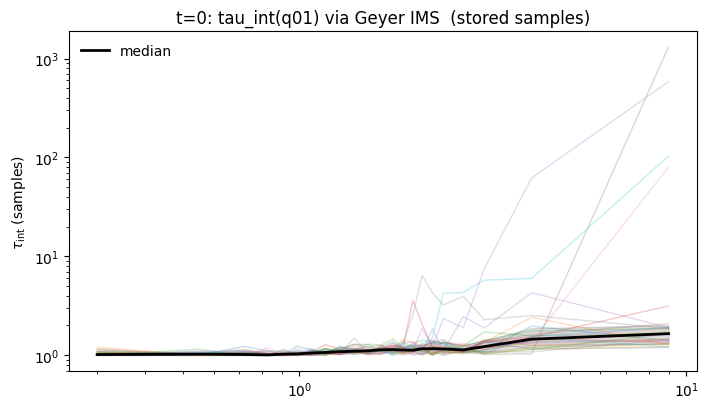

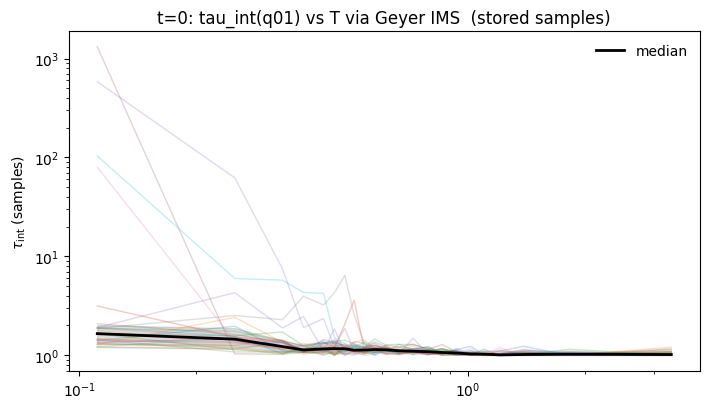

In [9]:
# ----------------------------
# 3) Compute tau_int vs beta at t=0 for q01 (scalar, no chain)
# ----------------------------
# burn is in stored samples. you said you likely don't need it, keep as option.
burn = 0.0
min_n = 200

tau_q = tau_q01_t0(q01_all, k_start=k_start, burn=burn, min_n=min_n)
# tau_q.tau_geyer shape: (n_rid, K0)
print("== tau(q01) ==")
print("tau_q.tau_geyer shape:", tau_q.tau_geyer.shape)
print("median Neff at cold node:", np.nanmedian(tau_q.neff_geyer[:, k_cold]))
print("median split_z at cold node:", np.nanmedian(tau_q.split_z[:, k_cold]))
print()

# Plot overlay tau vs beta (and optionally vs T)
plot_tau_overlay(
    beta_t0,
    tau_q.tau_geyer,
    log_x=True,
    title="t=0: tau_int(q01) via Geyer IMS  (stored samples)",
)
plt.show()

plot_tau_overlay(
    T_t0,
    tau_q.tau_geyer,
    log_x=True,
    title="t=0: tau_int(q01) vs T via Geyer IMS  (stored samples)",
)
plt.show()

== tau(q01) ==
tau_q.tau_geyer shape: (28, 22)
median Neff at cold node: 2457.7338479672244
median split_z at cold node: 0.6844325296824

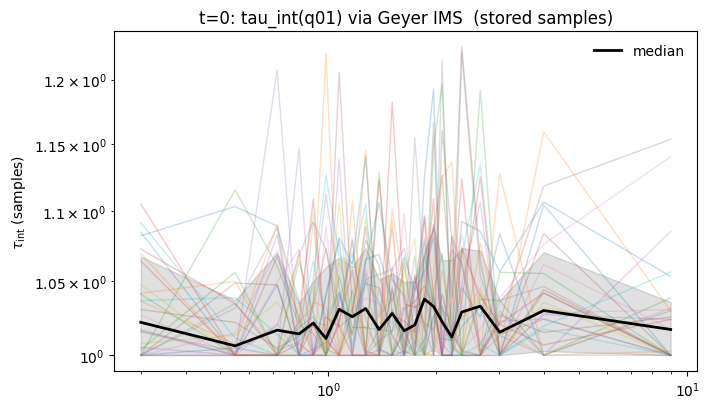

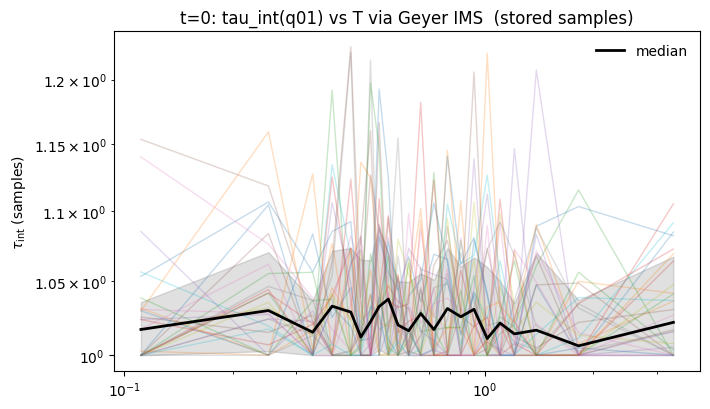

== tau(m_mu0) ==
tau_m0.tau_geyer shape: (28, 22)
median Neff at cold node: 249.4267422048631
median split_z at cold node: 4.498824718028372



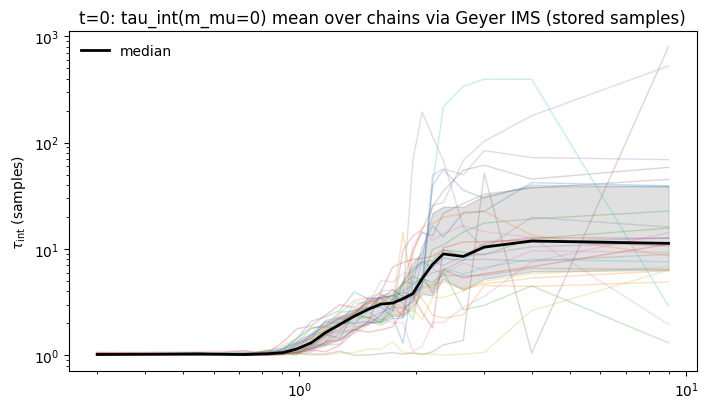

In [10]:
# ----------------------------
# 4) tau_int for magnetization mu=0 (per chain then mean over chains)
# ----------------------------
tau_m0 = tau_m_mu_t0(m0_all, k_start=k_start, burn=burn, min_n=min_n, chain_reduce="mean")
# tau_m0.tau_geyer shape: (n_rid, K0)
print("== tau(m_mu0) ==")
print("tau_m0.tau_geyer shape:", tau_m0.tau_geyer.shape)
print("median Neff at cold node:", np.nanmedian(tau_m0.neff_geyer[:, k_cold]))
print("median split_z at cold node:", np.nanmedian(tau_m0.split_z[:, k_cold]))
print()

plot_tau_overlay(
    beta_t0,
    tau_m0.tau_geyer,
    log_x=True,
    title=f"t=0: tau_int(m_mu={mu0}) mean over chains via Geyer IMS (stored samples)",
)
plt.show()

== tau(m_mu0) ==
tau_m0.tau_geyer shape: (28, 22)
median Neff at cold node: 1301.9586938595635
median split_z at cold node: 1.4723702537506282

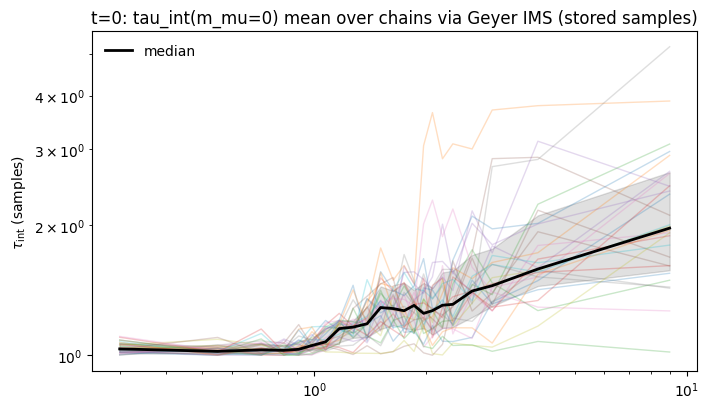

In [11]:
# ----------------------------
# 5) (Optional, heavier) tau_int for ALL mu (memory-safe streaming)
#    Output has shape (n_rid, K0, P_mu) if chain_reduce='mean'
# ----------------------------
# If P_sel is large and N_data is 5000, this can be slow (but won't explode RAM).
do_all_mu = False
if do_all_mu:
    tau_mu = tau_m_all_mu_streamed_t0(
        f, run_root,
        b=0,
        mu_list=None,            # or np.arange(P_sel) or a subset
        chain_reduce="mean",
        burn=burn,
        min_n=min_n,
        progress=True,
    )
    # Example: worst mu per (rid,k) by tau
    tau_mu_gey = tau_mu.tau_geyer          # (n_rid, K0, P_mu)
    tau_worst_mu = np.nanmax(tau_mu_gey, axis=-1)   # (n_rid, K0)

    plot_tau_overlay(
        beta_t0,
        tau_worst_mu,
        log_x=True,
        title="t=0: max_mu tau_int(m_mu) (mean over chains) vs beta",
    )
    plt.show()

    # Example: argmax mu index (which mu is slowest)
    mu_idx = np.nanargmax(tau_mu_gey, axis=-1)      # (n_rid, K0) indices into tau_mu.mu_list
    mu_slowest = tau_mu.mu_list[mu_idx]             # (n_rid, K0) actual mu labels

    print("Example: slowest mu at cold node for first 10 disorders:")
    print(mu_slowest[:10, k_cold])

In [12]:
# ----------------------------
# 6) Symmetry-respecting magnetization scalars (memory-safe streaming)
#    (often more stable than raw m_mu)
# ----------------------------
do_scalar_mag = True
if do_scalar_mag:
    tau_norm2 = tau_m_norm2_streamed_t0(
        f, run_root, b=0,
        chain_reduce="mean",
        burn=burn,
        min_n=min_n,
        progress=True,

    )
    tau_maxab = tau_m_maxabs_streamed_t0(
        f, run_root, b=0,
        chain_reduce="mean",
        burn=burn,
        min_n=min_n,
        progress=True,

    )

[tau_norm2] mu=0 (1/20)
[tau_norm2] mu=1 (2/20)
[tau_norm2] mu=2 (3/20)
[tau_norm2] mu=3 (4/20)
[tau_norm2] mu=4 (5/20)
[tau_norm2] mu=5 (6/20)
[tau_norm2] mu=6 (7/20)
[tau_norm2] mu=7 (8/20)
[tau_norm2] mu=8 (9/20)
[tau_norm2] mu=9 (10/20)
[tau_norm2] mu=10 (11/20)
[tau_norm2] mu=11 (12/20)
[tau_norm2] mu=12 (13/20)
[tau_norm2] mu=13 (14/20)
[tau_norm2] mu=14 (15/20)
[tau_norm2] mu=15 (16/20)
[tau_norm2] mu=16 (17/20)
[tau_norm2] mu=17 (18/20)
[tau_norm2] mu=18 (19/20)
[tau_norm2] mu=19 (20/20)
[tau_maxabs] mu=0 (1/20)
[tau_maxabs] mu=1 (2/20)
[tau_maxabs] mu=2 (3/20)
[tau_maxabs] mu=3 (4/20)
[tau_maxabs] mu=4 (5/20)
[tau_maxabs] mu=5 (6/20)
[tau_maxabs] mu=6 (7/20)
[tau_maxabs] mu=7 (8/20)
[tau_maxabs] mu=8 (9/20)
[tau_maxabs] mu=9 (10/20)
[tau_maxabs] mu=10 (11/20)
[tau_maxabs] mu=11 (12/20)
[tau_maxabs] mu=12 (13/20)
[tau_maxabs] mu=13 (14/20)
[tau_maxabs] mu=14 (15/20)
[tau_maxabs] mu=15 (16/20)
[tau_maxabs] mu=16 (17/20)
[tau_maxabs] mu=17 (18/20)
[tau_maxabs] mu=18 (19/20)
[tau_

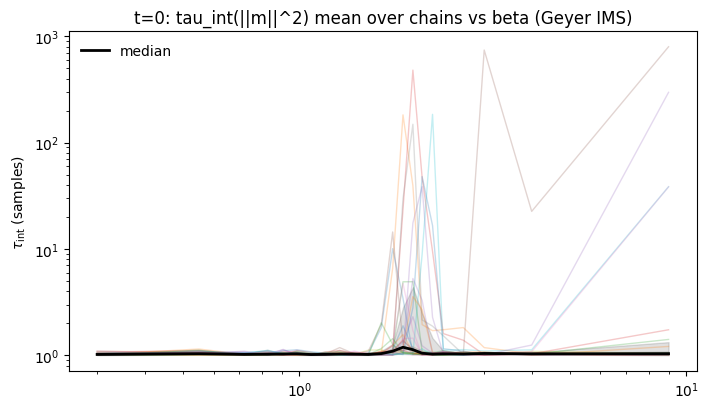

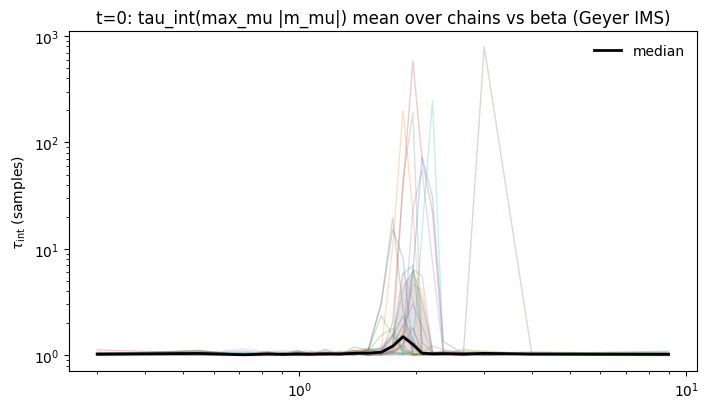

In [13]:
if do_scalar_mag:
    plot_tau_overlay(
        beta_t0,
        tau_norm2.tau_geyer,
        log_x=True,
        title="t=0: tau_int(||m||^2) mean over chains vs beta (Geyer IMS)",
    )
    plt.show()

    plot_tau_overlay(
        beta_t0,
        tau_maxab.tau_geyer,
        log_x=True,
        title="t=0: tau_int(max_mu |m_mu|) mean over chains vs beta (Geyer IMS)",
    )
    plt.show()

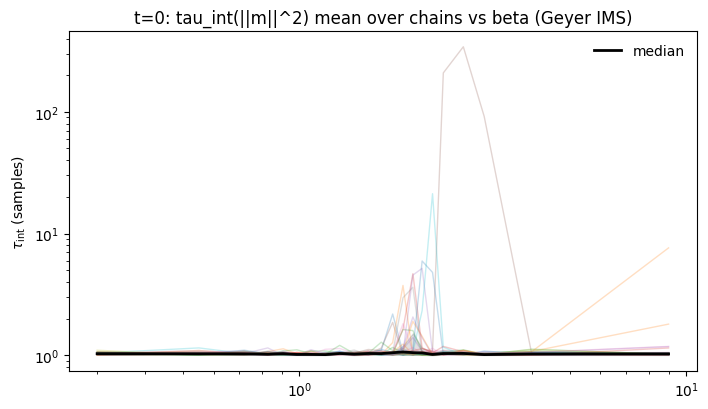
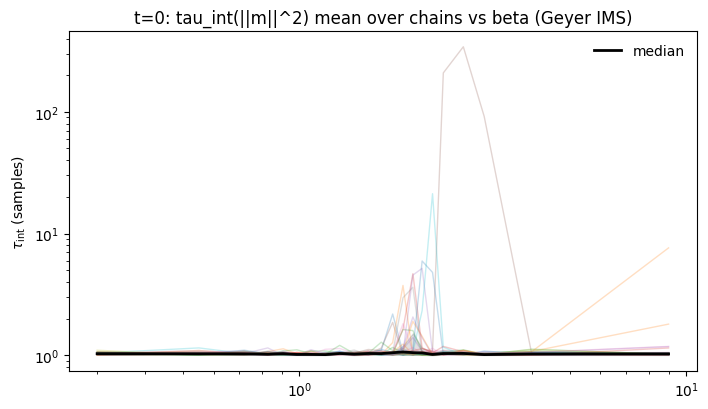

In [14]:
# ----------------------------
# 7) Quick “sanity spotlight” tables (optional printing)
#    - How many points are actually estimable? (Neff threshold)
# ----------------------------
Neff_thresh = 50
ok_q = (tau_q.ok_geyer) & (tau_q.neff_geyer >= Neff_thresh)
ok_m0 = (tau_m0.ok_geyer) & (tau_m0.neff_geyer >= Neff_thresh)

print("== Estimability (Neff>=50) ==")
print("q01:  fraction ok per node:", np.mean(ok_q, axis=0))
print("m_mu0: fraction ok per node:", np.mean(ok_m0, axis=0))
print()

# Done.


== Estimability (Neff>=50) ==
q01:  fraction ok per node: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.96428571 0.85714286]
m_mu0: fraction ok per node: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.96428571 0.96428571 0.92857143
 0.96428571 0.96428571 0.96428571 0.96428571]



== Estimability (Neff>=50) ==
q01:  fraction ok per node: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
m_mu0: fraction ok per node: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

In [15]:
np.nanmean(np.isfinite(tau_q.tau_bm)), np.nanmean(np.isfinite(tau_m0.tau_bm))


(np.float64(0.8896103896103896), np.float64(0.3133116883116883))

(np.float64(0.7775974025974026), np.float64(0.7840909090909091))

In [16]:
np.nanmedian(tau_q.tau_bm / tau_q.tau_geyer), np.nanmedian(tau_m0.tau_bm / tau_m0.tau_geyer)


(np.float64(0.9599029699144017), np.float64(0.9627304349096251))

(np.float64(0.7775974025974026), np.float64(0.7840909090909091))

In [17]:
# ============================
# REMAINING TESTS / CROSS-CHECKS BLOCK
# ============================
# This block assumes you already have:
#   - run_root (or run_root_2d)
#   - f imported
#   - metas = f(run_root, "meta"); meta = metas[0]
#   - beta_t0, T_t0, k_start, k_cold, r0,r1 computed as in the previous tour
#
# It adds:
#   (A) Batch-means vs Geyer agreement checks + plots
#   (B) Burn-in sensitivity checks
#   (C) Mode-sensitive magnetization scalars (streamed): ||m||^2 and max_mu |m_mu|
#   (D) “Slowest mu” scan (streamed) — optional heavy; can restrict mu_list
#   (E) Per-disorder overlay plots for all of the above
#   (F) Reliability masking (Neff threshold) and quick summaries


from dreamingnetz.pt_tau import (
    tau_q01_t0, tau_m_mu_t0, plot_tau_overlay,
    tau_m_norm2_streamed_t0, tau_m_maxabs_streamed_t0,
    tau_m_all_mu_streamed_t0,
)

In [18]:
# Small helpers for comparisons
# ------------------------------------------------------------
def tau_from_neff(T, neff):
    """tau ≈ T/(2 Neff) for quick sanity when tau itself isn't printed."""
    return T / (2.0 * neff)

def summary_ratio(name, tau_bm, tau_g):
    r = tau_bm / tau_g
    print(f"[{name}] finite BM fraction:", np.nanmean(np.isfinite(tau_bm)))
    print(f"[{name}] median (BM / Geyer):", np.nanmedian(r))
    print(f"[{name}] q05..q95 (BM / Geyer):",
          np.nanquantile(r, 0.05), np.nanquantile(r, 0.95))
    print()

def masked_median(Y, mask):
    """Median across rid with mask per entry; returns shape (K0,)"""
    Y = np.asarray(Y, float)
    M = np.where(mask, Y, np.nan)
    return np.nanmedian(M, axis=0)

def overlay_masked(x, Y, mask, *, title, log_x=True, q=0.2):
    """Overlay only where mask true; show median band from masked values."""
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(7.2, 4.2))
    for y, m in zip(Y, mask):
        ax.plot(x, np.where(m, y, np.nan), alpha=0.25, linewidth=1.0)
    med = masked_median(Y, mask)
    lo  = np.nanquantile(np.where(mask, Y, np.nan), q, axis=0)
    hi  = np.nanquantile(np.where(mask, Y, np.nan), 1.0-q, axis=0)
    ax.plot(x, med, color="k", linewidth=2.0, label="masked median")
    ax.fill_between(x, lo, hi, color="k", alpha=0.12)
    if log_x: ax.set_xscale("log")
    ax.set_title(title)
    ax.set_xlabel("beta" if np.all(x > 0) else "x")
    ax.set_ylabel(r"$\tau_{\mathrm{int}}$ (samples)")
    ax.legend(frameon=False)
    fig.tight_layout()
    return fig, ax

== A) BM vs Geyer for q01, burn=0 ==
[q01] finite BM fraction: 0.8896103896103896
[q01] median (BM / Geyer): 0.9599029699144017
[q01] q05..q95 (BM / Geyer): 0.7498419738016172 1.046103770325311



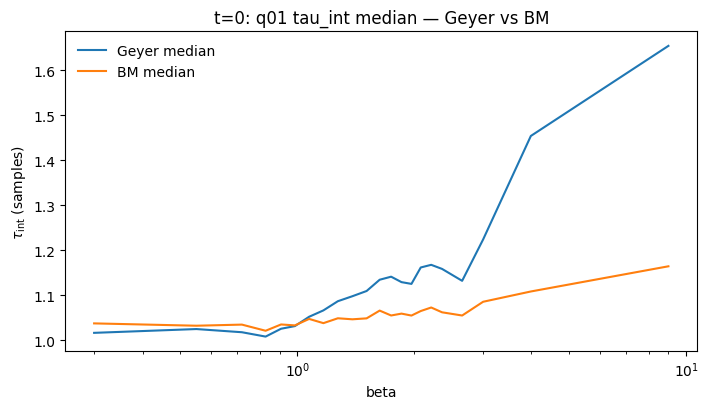

In [19]:
# ------------------------------------------------------------
# A) Batch-means (BM) vs Geyer (IMS) agreement
# ------------------------------------------------------------
q01_all = f(run_root, "q01")     # (n_rid,T,R)
T_samples = q01_all.shape[1]

tau_q_0 = tau_q01_t0(q01_all, k_start=k_start, burn=0.0, min_n=200)
print("== A) BM vs Geyer for q01, burn=0 ==")
summary_ratio("q01", tau_q_0.tau_bm, tau_q_0.tau_geyer)

# Plot: compare medians vs beta
fig, ax = plt.subplots(figsize=(7.2, 4.2))
ax.plot(beta_t0, np.nanmedian(tau_q_0.tau_geyer, axis=0), label="Geyer median")
ax.plot(beta_t0, np.nanmedian(tau_q_0.tau_bm, axis=0), label="BM median")
ax.set_xscale("log")
ax.set_xlabel("beta")
ax.set_ylabel(r"$\tau_{\mathrm{int}}$ (samples)")
ax.set_title("t=0: q01 tau_int median — Geyer vs BM")
ax.legend(frameon=False)
fig.tight_layout()
plt.show()


== A) BM vs Geyer for q01, burn=0 ==
[q01] finite BM fraction: 0.7775974025974026
[q01] median (BM / Geyer): 0.9984666524426098
[q01] q05..q95 (BM / Geyer): 0.9236877493803045 1.0644089817822735

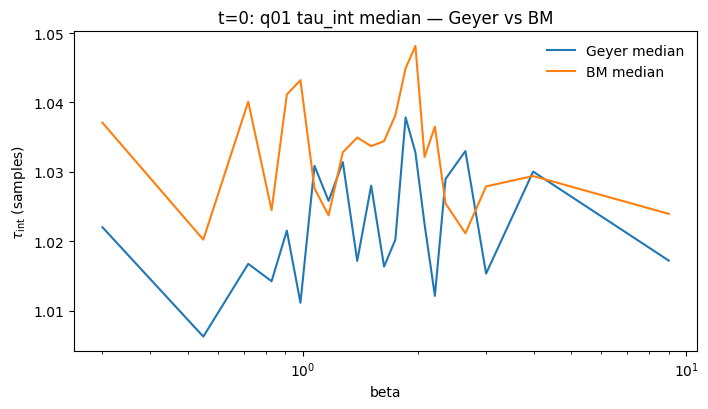


In [20]:

# ------------------------------------------------------------
# B) Burn-in sensitivity (burn=0 vs burn=10% for q01 and m_mu0)
# ------------------------------------------------------------
burn_frac = 0.10

tau_q_b = tau_q01_t0(q01_all, k_start=k_start, burn=burn_frac, min_n=200)

print("== B) Burn sensitivity q01 ==")
print("median tau (cold node) burn=0   :", np.nanmedian(tau_q_0.tau_geyer[:, k_cold]))
print("median tau (cold node) burn=0.1 :", np.nanmedian(tau_q_b.tau_geyer[:, k_cold]))
print("median ratio burn0.1/burn0      :", np.nanmedian(tau_q_b.tau_geyer / tau_q_0.tau_geyer))
print()

mu0 = 0
m0_all = f(run_root, "m", mu=mu0)  # (n_rid,2,T,R)
tau_m0_0 = tau_m_mu_t0(m0_all, k_start=k_start, burn=0.0, min_n=200, chain_reduce="mean")
tau_m0_b = tau_m_mu_t0(m0_all, k_start=k_start, burn=burn_frac, min_n=200, chain_reduce="mean")

print("== B) Burn sensitivity m_mu0 ==")
print("median tau (cold node) burn=0   :", np.nanmedian(tau_m0_0.tau_geyer[:, k_cold]))
print("median tau (cold node) burn=0.1 :", np.nanmedian(tau_m0_b.tau_geyer[:, k_cold]))
print("median ratio burn0.1/burn0      :", np.nanmedian(tau_m0_b.tau_geyer / tau_m0_0.tau_geyer))
print()


== B) Burn sensitivity q01 ==
median tau (cold node) burn=0   : 1.653952309527237
median tau (cold node) burn=0.1 : 1.6015367648396612
median ratio burn0.1/burn0      : 1.0

== B) Burn sensitivity m_mu0 ==
median tau (cold node) burn=0   : 11.283387754828784
median tau (cold node) burn=0.1 : 11.753737310953351
median ratio burn0.1/burn0      : 0.999871267641737



== B) Burn sensitivity q01 ==
median tau (cold node) burn=0   : 1.0171972407578274
median tau (cold node) burn=0.1 : 1.020496844523683
median ratio burn0.1/burn0      : 1.0

== B) Burn sensitivity m_mu0 ==
median tau (cold node) burn=0   : 1.9712167506718115
median tau (cold node) burn=0.1 : 1.9255840384333358
median ratio burn0.1/burn0      : 1.000889475869232

== C) Streaming tau for ||m||^2 and max_mu |m_mu| (t=0) ==
[tau_norm2] mu=0 (1/20)
[tau_norm2] mu=1 (2/20)
[tau_norm2] mu=2 (3/20)
[tau_norm2] mu=3 (4/20)
[tau_norm2] mu=4 (5/20)
[tau_norm2] mu=5 (6/20)
[tau_norm2] mu=6 (7/20)
[tau_norm2] mu=7 (8/20)
[tau_norm2] mu=8 (9/20)
[tau_norm2] mu=9 (10/20)
[tau_norm2] mu=10 (11/20)
[tau_norm2] mu=11 (12/20)
[tau_norm2] mu=12 (13/20)
[tau_norm2] mu=13 (14/20)
[tau_norm2] mu=14 (15/20)
[tau_norm2] mu=15 (16/20)
[tau_norm2] mu=16 (17/20)
[tau_norm2] mu=17 (18/20)
[tau_norm2] mu=18 (19/20)
[tau_norm2] mu=19 (20/20)
[tau_maxabs] mu=0 (1/20)
[tau_maxabs] mu=1 (2/20)
[tau_maxabs] mu=2 (3/20)
[tau_maxabs] mu=3 (4/20)
[tau_maxabs] mu=4 (5/20)
[tau_maxabs] mu=5 (6/20)
[tau_maxabs] mu=6 (7/20)
[tau_maxabs] mu=7 (8/20)
[tau_maxabs] mu=8 (9/20)
[tau_maxabs] mu=9 (10/20)
[tau_maxabs] mu=10 (11/20)
[tau_maxabs] mu=11 (12/20)
[tau_maxabs] mu=12 (13/20)
[tau_maxabs] mu=13 (14/20)
[tau_maxabs] mu=14 (15/20)
[tau_maxabs] mu=15 (16/20)
[tau_maxabs] mu=16 (17/20)


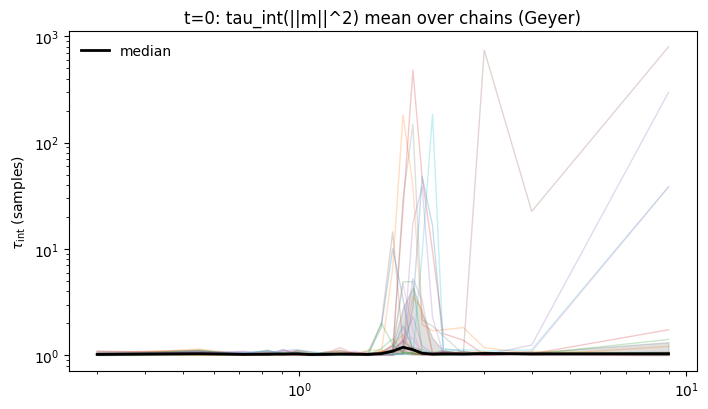

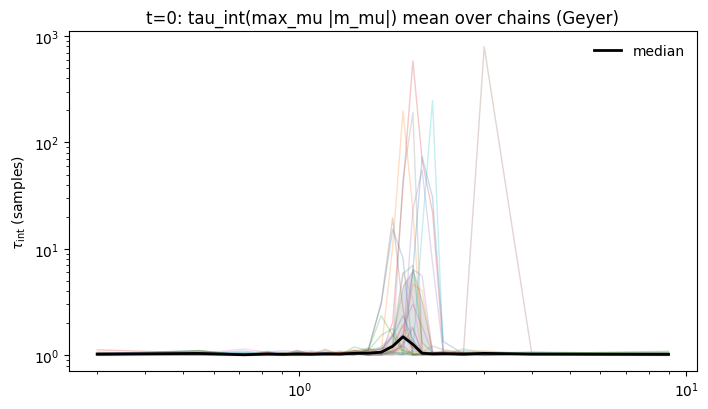

median tau cold node: ||m||^2 : 1.034649712762453
median tau cold node: maxabs  : 1.0197219710928418



In [ ]:

# ------------------------------------------------------------
# C) Mode-sensitive magnetization scalars (streamed, memory-safe)
# ------------------------------------------------------------
print("== C) Streaming tau for ||m||^2 and max_mu |m_mu| (t=0) ==")
tau_norm2 = tau_m_norm2_streamed_t0(
    f, run_root, b=0, chain_reduce="mean",
    burn=0.0, min_n=200, progress=True
)
tau_maxab = tau_m_maxabs_streamed_t0(
    f, run_root, b=0, chain_reduce="mean",
    burn=0.0, min_n=200, progress=True
)


In [ ]:

plot_tau_overlay(
    beta_t0, tau_norm2.tau_geyer, log_x=True,
    title="t=0: tau_int(||m||^2) mean over chains (Geyer)"
)
plt.show()

plot_tau_overlay(
    beta_t0, tau_maxab.tau_geyer, log_x=True,
    title="t=0: tau_int(max_mu |m_mu|) mean over chains (Geyer)"
)
plt.show()

print("median tau cold node: ||m||^2 :", np.nanmedian(tau_norm2.tau_geyer[:, k_cold]))
print("median tau cold node: maxabs  :", np.nanmedian(tau_maxab.tau_geyer[:, k_cold]))
print()


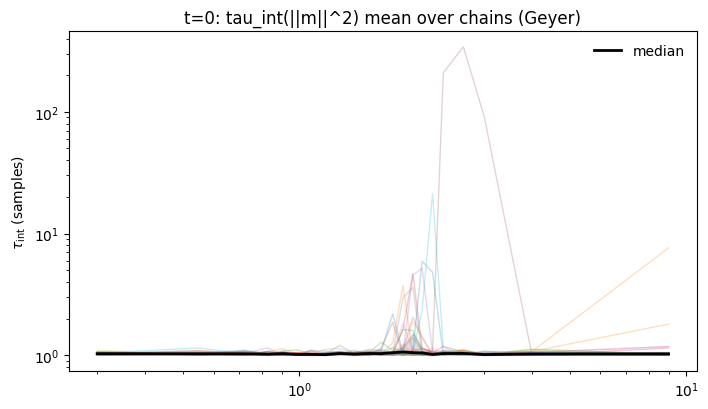
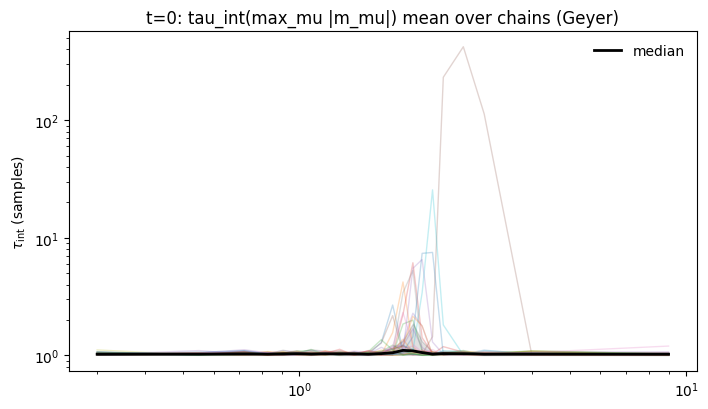


median tau cold node: ||m||^2 : 1.0262613238273053
median tau cold node: maxabs  : 1.0204791197579743

== D) Streaming tau for many mu (slowest-mu diagnostic) ==
[tau_mu] mu=0 (1/20)
[tau_mu] mu=1 (2/20)
[tau_mu] mu=2 (3/20)
[tau_mu] mu=3 (4/20)
[tau_mu] mu=4 (5/20)
[tau_mu] mu=5 (6/20)
[tau_mu] mu=6 (7/20)
[tau_mu] mu=7 (8/20)
[tau_mu] mu=8 (9/20)
[tau_mu] mu=9 (10/20)
[tau_mu] mu=10 (11/20)
[tau_mu] mu=11 (12/20)
[tau_mu] mu=12 (13/20)
[tau_mu] mu=13 (14/20)
[tau_mu] mu=14 (15/20)
[tau_mu] mu=15 (16/20)
[tau_mu] mu=16 (17/20)
[tau_mu] mu=17 (18/20)
[tau_mu] mu=18 (19/20)
[tau_mu] mu=19 (20/20)


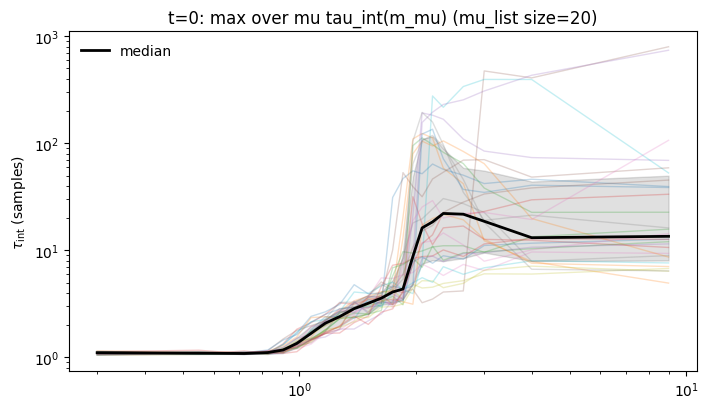

slowest-mu at cold node (first 10 disorders): [19  7  0  0 16 10 14 18  8  9]
median tau_slowest at cold node: 13.516839653459254



In [22]:

# ------------------------------------------------------------
# D) Slowest-mu scan (streamed). Optional heavy.
#     Start with a SUBSET of mu to keep it fast, then set do_all_mu=True.
# ------------------------------------------------------------
do_all_mu = False

# quick subset example: first 32 mus (or less if P small)
P_sel = int(meta.mu_to_store.size)
mu_subset = np.arange(min(P_sel, 32), dtype=np.int64)

if do_all_mu:
    mu_list = None   # all
else:
    mu_list = mu_subset

print("== D) Streaming tau for many mu (slowest-mu diagnostic) ==")
tau_mu = tau_m_all_mu_streamed_t0(
    f, run_root, b=0,
    mu_list=mu_list,
    chain_reduce="mean",
    burn=0.0, min_n=200,
    progress=True
)
# tau_mu.tau_geyer: (n_rid, K0, P_mu)
tau_mu_gey = tau_mu.tau_geyer
tau_slowest = np.nanmax(tau_mu_gey, axis=-1)       # (n_rid, K0)
mu_arg = np.nanargmax(tau_mu_gey, axis=-1)         # (n_rid, K0) indices 0..P_mu-1
mu_slowest = tau_mu.mu_list[mu_arg]                # actual mu labels

plot_tau_overlay(
    beta_t0, tau_slowest, log_x=True,
    title=f"t=0: max over mu tau_int(m_mu) (mu_list size={tau_mu.mu_list.size})"
)
plt.show()

print("slowest-mu at cold node (first 10 disorders):", mu_slowest[:10, k_cold])
print("median tau_slowest at cold node:", np.nanmedian(tau_slowest[:, k_cold]))
print()


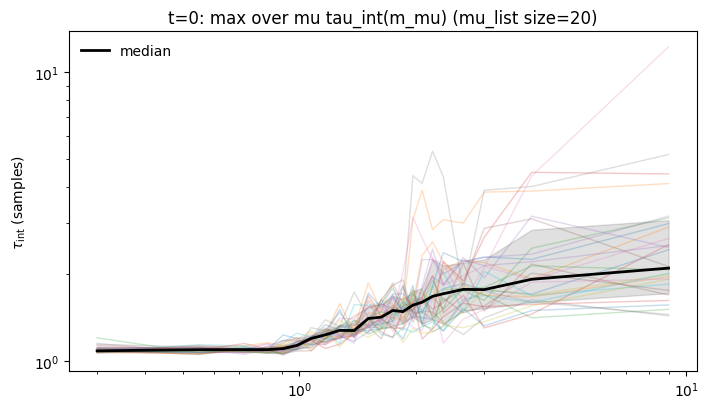



slowest-mu at cold node (first 10 disorders): [14 10  3 17  5  6  8  9 14 17]
median tau_slowest at cold node: 2.099493912667742

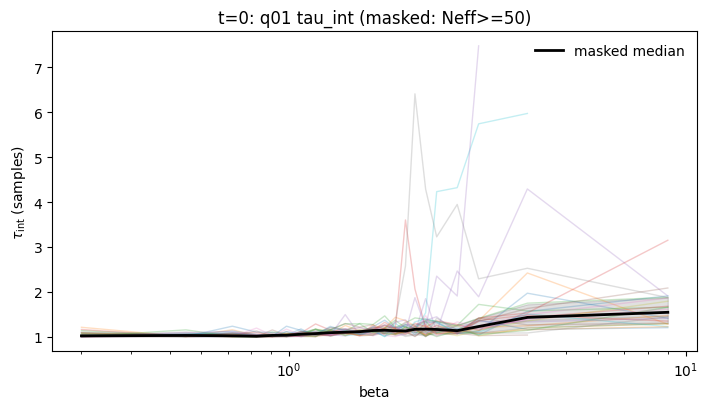

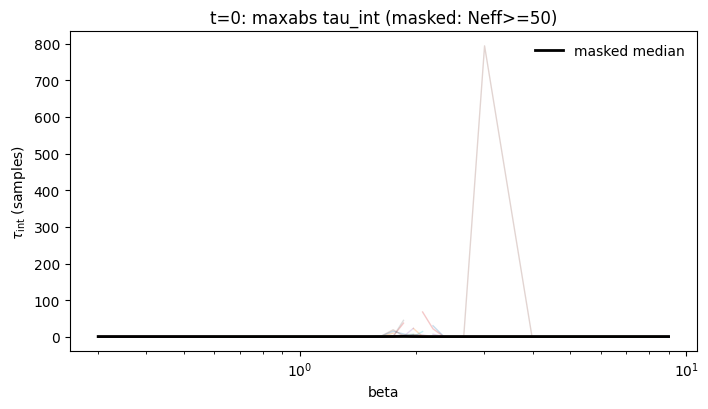

In [23]:

# ------------------------------------------------------------
# E) Reliability masking (Neff threshold + ok flags)
# ------------------------------------------------------------
Neff_thresh = 50

# For q01:
mask_q = (tau_q_0.ok_geyer) & (tau_q_0.neff_geyer >= Neff_thresh)    # (n_rid,K0)
overlay_masked(
    beta_t0,
    tau_q_0.tau_geyer,
    mask_q,
    title=f"t=0: q01 tau_int (masked: Neff>={Neff_thresh})",
    log_x=True,
)
plt.show()

# For maxabs:
mask_max = (tau_maxab.ok_geyer) & (tau_maxab.neff_geyer >= Neff_thresh)
overlay_masked(
    beta_t0,
    tau_maxab.tau_geyer,
    mask_max,
    title=f"t=0: maxabs tau_int (masked: Neff>={Neff_thresh})",
    log_x=True,
)
plt.show()


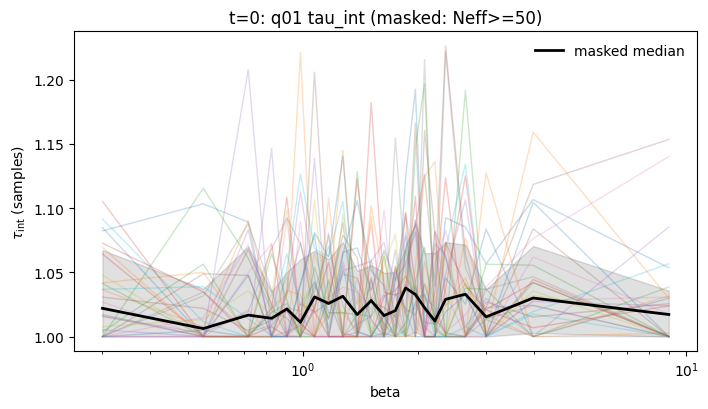

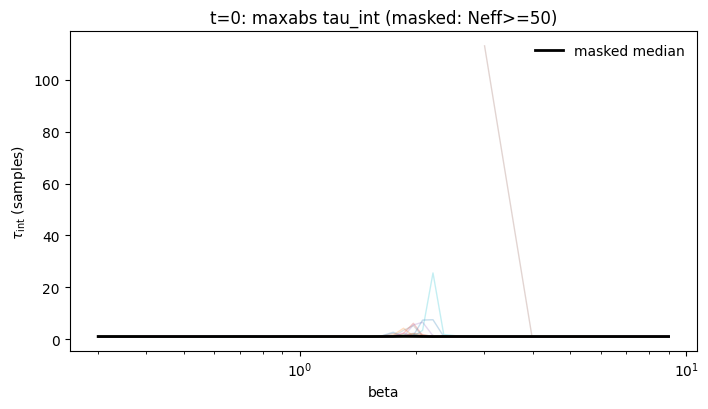

In [24]:

# ------------------------------------------------------------
# F) “Are taus suspiciously ~1?” quick sanity via Neff
# ------------------------------------------------------------
print("== F) Quick sanity: tau from Neff at cold node (median) ==")
print("q01   tau≈", tau_from_neff(T_samples, np.nanmedian(tau_q_0.neff_geyer[:, k_cold])))
print("m_mu0 tau≈", tau_from_neff(T_samples, np.nanmedian(tau_m0_0.neff_geyer[:, k_cold])))
print("norm2 tau≈", tau_from_neff(T_samples, np.nanmedian(tau_norm2.neff_geyer[:, k_cold])))
print("maxab tau≈", tau_from_neff(T_samples, np.nanmedian(tau_maxab.neff_geyer[:, k_cold])))
if tau_mu is not None:
    # tau_mu doesn't carry neff per mu in a compact way; use tau directly
    print("slowest(mu_list) median tau at cold node:", np.nanmedian(tau_slowest[:, k_cold]))
print()

# Done.


== F) Quick sanity: tau from Neff at cold node (median) ==
q01   tau≈ 1.6539522966510647
m_mu0 tau≈ 10.022983012569922
norm2 tau≈ 1.0345190506710593
maxab tau≈ 1.0193349206834357
slowest(mu_list) median tau at cold node: 13.516839653459254



== F) Quick sanity: tau from Neff at cold node (median) ==
q01   tau≈ 1.0171972046801299
m_mu0 tau≈ 1.920183805976923
norm2 tau≈ 1.025589311556293
maxab tau≈ 1.0201893175256729
slowest(mu_list) median tau at cold node: 2.099493912667742

In [25]:
accs_2d  = f(run_root_2d, "acc")  
h_rate_2d = 0.1 * np.stack([a.h_accepted_per_sample for a in accs_2d], axis=0) # (n_rid, 2, R-1)
t_0_h_rate_2d = h_rate_2d[:,:,k_start[0]:k_start[1]-1]

accs_1d  = f(run_root_1d, "acc")  
h_rate_1d = 0.1 * np.stack([a.h_accepted_per_sample for a in accs_1d], axis=0) # (n_rid, 2, R-1)
t_0_h_rate_1d = h_rate_1d[:,:,k_start[0]:k_start[1]-1]


t_0_betas = m0.beta[k_start[0]:k_start[1]]

NameError: name 'm0' is not defined

In [ ]:
def plot_acceptance_overlay_vs_temperature_arrays(
    betas_row,                 # (Kb,)
    h_row,                     # (n_rid, 2, Kb-1)  (your t_0_h_rate)
    *,
    chain="mean",              # 0 | 1 | "mean" | "both"
    x_axis="T",                # "beta" or "T"
    midpoint="beta",           # "beta" or "T"
    log_x=True,
    alpha=0.25,
    lw=1.0,
    show_summary=True,
    q=0.02,
    title=None,
    xlim=None,
    ylim=(-0.02, 1.02),
    ax=None,
):
    """
    Overlay per-disorder horizontal swap metric (whatever h_row encodes) vs interface midpoint.

    betas_row: (Kb,) betas for one ladder row (fixed t)
    h_row    : (n_rid, 2, Kb-1) value per interface; chain axis is your two replicas

    Midpoint choices:
      midpoint="beta": beta_mid = 0.5*(beta_k+beta_{k+1}), T_mid=1/beta_mid
      midpoint="T"   : T_mid    = 0.5*(1/beta_k+1/beta_{k+1}), beta_mid=1/T_mid
    """
    bet = np.asarray(betas_row, dtype=np.float64)
    if bet.ndim != 1:
        raise ValueError(f"betas_row must be 1D (Kb,), got shape {bet.shape}")
    Kb = bet.size
    if Kb < 2:
        raise ValueError("Need at least 2 betas to define interfaces.")

    H = np.asarray(h_row, dtype=np.float64)
    if H.ndim != 3:
        raise ValueError(f"h_row must be (n_rid,2,Kb-1), got shape {H.shape}")
    if H.shape[1] != 2 or H.shape[2] != (Kb - 1):
        raise ValueError(f"h_row has shape {H.shape}, expected (n_rid,2,{Kb-1})")

    beta_k  = bet[:-1]
    beta_k1 = bet[1:]

    beta_mid = 0.5 * (beta_k + beta_k1)
    T_k  = 1.0 / beta_k
    T_k1 = 1.0 / beta_k1
    T_mid_T = 0.5 * (T_k + T_k1)

    if midpoint == "beta":
        beta_x = beta_mid
        T_x = 1.0 / beta_mid
    elif midpoint == "T":
        T_x = T_mid_T
        beta_x = 1.0 / T_mid_T
    else:
        raise ValueError("midpoint must be 'beta' or 'T'.")

    if x_axis == "beta":
        x = beta_x
        xlabel = f"beta midpoint (midpoint in {midpoint})"
    elif x_axis == "T":
        x = T_x
        xlabel = f"T midpoint (midpoint in {midpoint})"
    else:
        raise ValueError("x_axis must be 'beta' or 'T'.")

    # Build Y: (M, Kb-1)
    if chain == "mean":
        Y = np.nanmean(H, axis=1)          # (n_rid, Kb-1)
    elif chain in (0, 1):
        Y = H[:, int(chain), :]            # (n_rid, Kb-1)
    elif chain == "both":
        Y = np.concatenate([H[:, 0, :], H[:, 1, :]], axis=0)  # (2*n_rid, Kb-1)
    else:
        raise ValueError("chain must be 0, 1, 'mean', or 'both'.")

    if ax is None:
        fig, ax = plt.subplots(figsize=(7.2, 4.2))
    else:
        fig = ax.figure

    for y in Y:
        ax.plot(x, y, alpha=alpha, linewidth=lw)

    if show_summary:
        med = np.nanmedian(Y, axis=0)
        lo  = np.nanquantile(Y, q, axis=0)
        hi  = np.nanquantile(Y, 1.0 - q, axis=0)
        ax.plot(x, med, color="k", linewidth=2.0, label="median")
        ax.fill_between(x, lo, hi, color="k", alpha=0.12)

    ax.set_xlabel(xlabel)
    ax.set_ylabel("horizontal swap metric")  # rename if you want
    ax.set_ylim(*ylim)

    if log_x:
        ax.set_xscale("log")

    if xlim is not None:
        ax.set_xlim(*xlim)

    ax.set_title(title or f"Horizontal metric vs {x_axis} | chain={chain}")

    if show_summary:
        ax.legend(frameon=False)

    fig.tight_layout()
    return fig, ax


(<Figure size 720x420 with 1 Axes>,
 <Axes: title={'center': 't=0 horizontal (scaled) rate vs T'}, xlabel='T midpoint (midpoint in beta)', ylabel='horizontal swap metric'>)

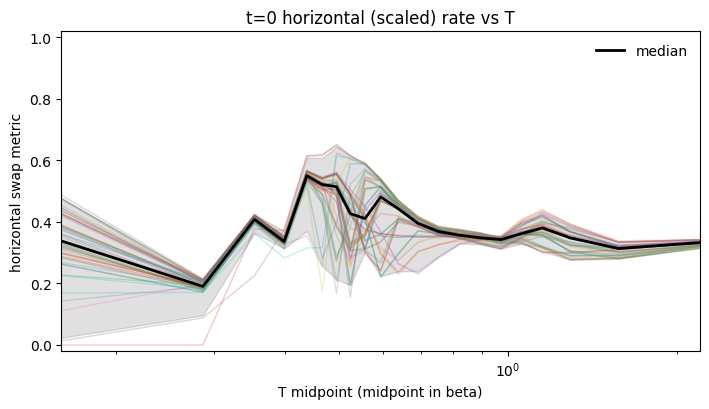

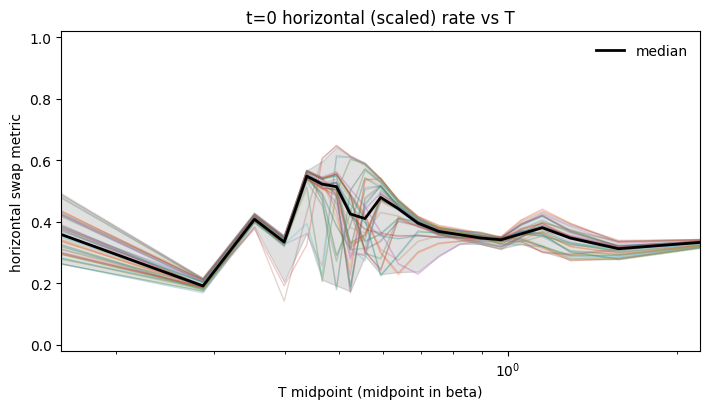

In [ ]:
plot_acceptance_overlay_vs_temperature_arrays(
    t_0_betas, t_0_h_rate_1d,
    x_axis="T",
    midpoint="beta",
    chain="both",
    log_x=True,
    title="t=0 horizontal (scaled) rate vs T",
    q=0.02,
    xlim=(0.16,2.2),
)
plot_acceptance_overlay_vs_temperature_arrays(
    t_0_betas, t_0_h_rate_2d,
    x_axis="T",
    midpoint="beta",
    chain="both",
    log_x=True,
    title="t=0 horizontal (scaled) rate vs T",
    q=0.02,
    xlim=(0.16,2.2),
)